In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PEA15.20231014T151028.csv')

# Understanding the Data Structure 

In [223]:
df.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  584 non-null    object 
 1   Year             584 non-null    int64  
 2   Component        584 non-null    object 
 3   UNIT             584 non-null    object 
 4   VALUE            440 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 22.9+ KB


# Checking for Missing Data

In [225]:
df.shape[0] #Number of rows in the dataset
df.shape[1] #Number of columns in the dataset

5

In [226]:
df.isnull().sum() # check for null values in the data set

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

# Data Consistency and Uniqueness

In [227]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
579    False
580    False
581    False
582    False
583    False
Length: 584, dtype: bool

In [228]:
#Check for Iconsistant data

df.Component.value_counts()

Annual births        73
Annual deaths        73
Natural increase     73
Immigrants           73
Emigrants            73
Net migration        73
Population change    73
Population           73
Name: Component, dtype: int64

In [229]:
df.UNIT.value_counts()

Thousand    584
Name: UNIT, dtype: int64

In [230]:
df['STATISTIC Label'].value_counts()

Annual Population Change    584
Name: STATISTIC Label, dtype: int64

# Handling Missing Data

In [231]:
df.isna().sum()

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

In [232]:
# view rows with missing values
df.isna().any(axis=1)

0       True
1       True
2      False
3       True
4       True
       ...  
579    False
580    False
581    False
582    False
583    False
Length: 584, dtype: bool

In [233]:
df[df.isna().any(axis=1)]

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN
8,Annual Population Change,1952,Annual births,Thousand,NaN
...,...,...,...,...,...
276,Annual Population Change,1985,Emigrants,Thousand,NaN
280,Annual Population Change,1986,Annual births,Thousand,NaN
281,Annual Population Change,1986,Annual deaths,Thousand,NaN
283,Annual Population Change,1986,Immigrants,Thousand,NaN


In [234]:
df.tail()

,STATISTIC Label,Year,Component,UNIT,VALUE
579,Annual Population Change,2023,Immigrants,Thousand,141.6
580,Annual Population Change,2023,Emigrants,Thousand,64.0
581,Annual Population Change,2023,Net migration,Thousand,77.6
582,Annual Population Change,2023,Population change,Thousand,97.6
583,Annual Population Change,2023,Population,Thousand,5281.6


In [235]:
df.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  584 non-null    object 
 1   Year             584 non-null    int64  
 2   Component        584 non-null    object 
 3   UNIT             584 non-null    object 
 4   VALUE            440 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 22.9+ KB


In [237]:
df.VALUE.value_counts(dropna=False)

 NaN       144
 33.3        5
 31.2        4
 28.6        4
 32.0        4
          ... 
 3546.5      1
-23.0        1
 40.2        1
 29.0        1
 5281.6      1
Name: VALUE, Length: 370, dtype: int64

In [238]:
df.isna()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
579,False,False,False,False,False
580,False,False,False,False,False
581,False,False,False,False,False
582,False,False,False,False,False


In [239]:
df.isna().any(axis=1)

0       True
1       True
2      False
3       True
4       True
       ...  
579    False
580    False
581    False
582    False
583    False
Length: 584, dtype: bool

In [240]:
df[df.isna().any(axis=1)]

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN
8,Annual Population Change,1952,Annual births,Thousand,NaN
...,...,...,...,...,...
276,Annual Population Change,1985,Emigrants,Thousand,NaN
280,Annual Population Change,1986,Annual births,Thousand,NaN
281,Annual Population Change,1986,Annual deaths,Thousand,NaN
283,Annual Population Change,1986,Immigrants,Thousand,NaN


In [241]:
#df = df.dropna()

In [242]:
df.head(80)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN
...,...,...,...,...,...
75,Annual Population Change,1960,Immigrants,Thousand,NaN
76,Annual Population Change,1960,Emigrants,Thousand,NaN
77,Annual Population Change,1960,Net migration,Thousand,-41.0
78,Annual Population Change,1960,Population change,Thousand,-13.5


In [243]:
value_to_drop = 'Population'

df = df[df['Component'] != value_to_drop]
print(df)

              STATISTIC Label  Year          Component      UNIT  VALUE
0    Annual Population Change  1951      Annual births  Thousand    NaN
1    Annual Population Change  1951      Annual deaths  Thousand    NaN
2    Annual Population Change  1951   Natural increase  Thousand   26.6
3    Annual Population Change  1951         Immigrants  Thousand    NaN
4    Annual Population Change  1951          Emigrants  Thousand    NaN
..                        ...   ...                ...       ...    ...
578  Annual Population Change  2023   Natural increase  Thousand   20.0
579  Annual Population Change  2023         Immigrants  Thousand  141.6
580  Annual Population Change  2023          Emigrants  Thousand   64.0
581  Annual Population Change  2023      Net migration  Thousand   77.6
582  Annual Population Change  2023  Population change  Thousand   97.6

[511 rows x 5 columns]


# Calculating Descriptive Statistics

In [247]:
#Using the median to calculate missing values
df.VALUE.mean()

33.096730245231605

In [248]:

target_name1 = 'Annual births'

# Filter the DataFrame based on the 'Name' column
filtered_df1 = df[df['Component'] == target_name1]  

print(filtered_df1)


              STATISTIC Label  Year      Component      UNIT  VALUE
0    Annual Population Change  1951  Annual births  Thousand    NaN
8    Annual Population Change  1952  Annual births  Thousand    NaN
16   Annual Population Change  1953  Annual births  Thousand    NaN
24   Annual Population Change  1954  Annual births  Thousand    NaN
32   Annual Population Change  1955  Annual births  Thousand    NaN
..                        ...   ...            ...       ...    ...
544  Annual Population Change  2019  Annual births  Thousand   60.5
552  Annual Population Change  2020  Annual births  Thousand   59.1
560  Annual Population Change  2021  Annual births  Thousand   57.3
568  Annual Population Change  2022  Annual births  Thousand   59.7
576  Annual Population Change  2023  Annual births  Thousand   55.5

[73 rows x 5 columns]


In [249]:
filtered_df1.VALUE.mean()

60.10540540540542

In [250]:
filtered_df1.VALUE.mode()

0    61.2
Name: VALUE, dtype: float64

In [251]:

column_name = 'VALUE'  # Replace with your actual column name

# Calculate the mean for the specified column, excluding NaN values
mean_value = filtered_df1[column_name].mean(skipna=True)

print(f"The mean value for column '{column_name}' (excluding NaN) is: {mean_value:.2f}")


The mean value for column 'VALUE' (excluding NaN) is: 60.11


In [252]:

target_name1 = 'Annual births'

filtered_df1 = df[df['Component'] == target_name1]
#Use .loc to modify the 'VALUE' column
filtered_df1.loc[filtered_df1.VALUE.isna(), 'VALUE'] = 60.11

print(filtered_df1)

              STATISTIC Label  Year      Component      UNIT  VALUE
0    Annual Population Change  1951  Annual births  Thousand  60.11
8    Annual Population Change  1952  Annual births  Thousand  60.11
16   Annual Population Change  1953  Annual births  Thousand  60.11
24   Annual Population Change  1954  Annual births  Thousand  60.11
32   Annual Population Change  1955  Annual births  Thousand  60.11
..                        ...   ...            ...       ...    ...
544  Annual Population Change  2019  Annual births  Thousand  60.50
552  Annual Population Change  2020  Annual births  Thousand  59.10
560  Annual Population Change  2021  Annual births  Thousand  57.30
568  Annual Population Change  2022  Annual births  Thousand  59.70
576  Annual Population Change  2023  Annual births  Thousand  55.50

[73 rows x 5 columns]


In [253]:
target_name2 = 'Annual deaths'

filtered_df2 = df[df['Component'] == target_name2] 

print(filtered_df2)

              STATISTIC Label  Year      Component      UNIT  VALUE
1    Annual Population Change  1951  Annual deaths  Thousand    NaN
9    Annual Population Change  1952  Annual deaths  Thousand    NaN
17   Annual Population Change  1953  Annual deaths  Thousand    NaN
25   Annual Population Change  1954  Annual deaths  Thousand    NaN
33   Annual Population Change  1955  Annual deaths  Thousand    NaN
..                        ...   ...            ...       ...    ...
545  Annual Population Change  2019  Annual deaths  Thousand   30.9
553  Annual Population Change  2020  Annual deaths  Thousand   32.4
561  Annual Population Change  2021  Annual deaths  Thousand   34.3
569  Annual Population Change  2022  Annual deaths  Thousand   33.6
577  Annual Population Change  2023  Annual deaths  Thousand   35.5

[73 rows x 5 columns]


In [254]:
filtered_df2.VALUE.mean()

30.651351351351355

In [255]:
target_name2 = 'Annual deaths'
filtered_df2 = df[df['Component'] == target_name2] 

filtered_df2.loc[filtered_df2.VALUE.isna(), 'VALUE'] = 30.65
print(filtered_df2)

              STATISTIC Label  Year      Component      UNIT  VALUE
1    Annual Population Change  1951  Annual deaths  Thousand  30.65
9    Annual Population Change  1952  Annual deaths  Thousand  30.65
17   Annual Population Change  1953  Annual deaths  Thousand  30.65
25   Annual Population Change  1954  Annual deaths  Thousand  30.65
33   Annual Population Change  1955  Annual deaths  Thousand  30.65
..                        ...   ...            ...       ...    ...
545  Annual Population Change  2019  Annual deaths  Thousand  30.90
553  Annual Population Change  2020  Annual deaths  Thousand  32.40
561  Annual Population Change  2021  Annual deaths  Thousand  34.30
569  Annual Population Change  2022  Annual deaths  Thousand  33.60
577  Annual Population Change  2023  Annual deaths  Thousand  35.50

[73 rows x 5 columns]


In [256]:
target_name3 = 'Immigrants'

filtered_df3 = df[df['Component'] == target_name3] 

#print(filtered_df3)


In [257]:
filtered_df3.VALUE.mean()

65.40540540540539

In [258]:
target_name3 = 'Immigrants'
filtered_df3 = df[df['Component'] == target_name3] 

filtered_df3.loc[filtered_df3.VALUE.isna(), 'VALUE'] = 65.41
target_name3 = 'Immigrants'

print(filtered_df3)

              STATISTIC Label  Year   Component      UNIT   VALUE
3    Annual Population Change  1951  Immigrants  Thousand   65.41
11   Annual Population Change  1952  Immigrants  Thousand   65.41
19   Annual Population Change  1953  Immigrants  Thousand   65.41
27   Annual Population Change  1954  Immigrants  Thousand   65.41
35   Annual Population Change  1955  Immigrants  Thousand   65.41
..                        ...   ...         ...       ...     ...
547  Annual Population Change  2019  Immigrants  Thousand   97.10
555  Annual Population Change  2020  Immigrants  Thousand   95.60
563  Annual Population Change  2021  Immigrants  Thousand   74.10
571  Annual Population Change  2022  Immigrants  Thousand  107.80
579  Annual Population Change  2023  Immigrants  Thousand  141.60

[73 rows x 5 columns]


In [259]:

target_name4 = 'Emigrants'

filtered_df4 = df[df['Component'] == target_name4] 
print(filtered_df4)

              STATISTIC Label  Year  Component      UNIT  VALUE
4    Annual Population Change  1951  Emigrants  Thousand    NaN
12   Annual Population Change  1952  Emigrants  Thousand    NaN
20   Annual Population Change  1953  Emigrants  Thousand    NaN
28   Annual Population Change  1954  Emigrants  Thousand    NaN
36   Annual Population Change  1955  Emigrants  Thousand    NaN
..                        ...   ...        ...       ...    ...
548  Annual Population Change  2019  Emigrants  Thousand   53.1
556  Annual Population Change  2020  Emigrants  Thousand   50.9
564  Annual Population Change  2021  Emigrants  Thousand   52.3
572  Annual Population Change  2022  Emigrants  Thousand   56.1
580  Annual Population Change  2023  Emigrants  Thousand   64.0

[73 rows x 5 columns]


In [260]:
filtered_df4.VALUE.mean()

48.45945945945946

In [261]:
target_name4 = 'Emigrants'
filtered_df4 = df[df['Component'] == target_name4] 

filtered_df4.loc[df.VALUE.isna(), 'VALUE'] = 48.46
print(filtered_df4)


              STATISTIC Label  Year  Component      UNIT  VALUE
4    Annual Population Change  1951  Emigrants  Thousand  48.46
12   Annual Population Change  1952  Emigrants  Thousand  48.46
20   Annual Population Change  1953  Emigrants  Thousand  48.46
28   Annual Population Change  1954  Emigrants  Thousand  48.46
36   Annual Population Change  1955  Emigrants  Thousand  48.46
..                        ...   ...        ...       ...    ...
548  Annual Population Change  2019  Emigrants  Thousand  53.10
556  Annual Population Change  2020  Emigrants  Thousand  50.90
564  Annual Population Change  2021  Emigrants  Thousand  52.30
572  Annual Population Change  2022  Emigrants  Thousand  56.10
580  Annual Population Change  2023  Emigrants  Thousand  64.00

[73 rows x 5 columns]


In [262]:
filtered_df4['VALUE']

4      48.46
12     48.46
20     48.46
28     48.46
36     48.46
       ...  
548    53.10
556    50.90
564    52.30
572    56.10
580    64.00
Name: VALUE, Length: 73, dtype: float64

In [263]:
filtered_df4['VALUE'].round().value_counts().sort_index()

25.0     1
26.0     3
27.0     1
29.0     3
31.0     1
32.0     1
33.0     2
35.0     3
36.0     1
40.0     1
46.0     1
48.0    36
49.0     1
51.0     1
52.0     2
53.0     1
56.0     3
61.0     1
64.0     1
66.0     1
69.0     1
70.0     1
71.0     1
72.0     1
75.0     1
81.0     2
83.0     1
Name: VALUE, dtype: int64

# Visualization

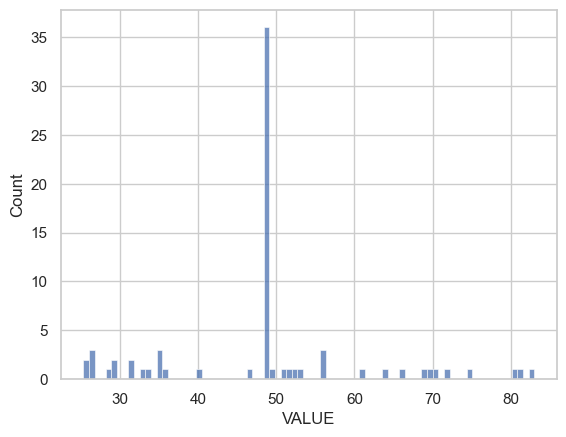

In [264]:
sns.histplot(filtered_df4['VALUE'], bins=80);

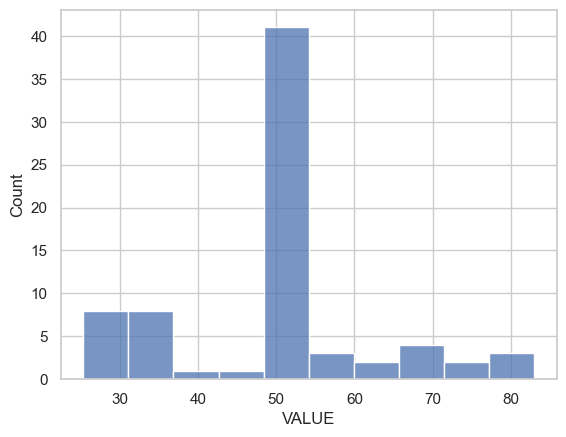

In [265]:
sns.histplot(filtered_df4['VALUE'], bins=10);

<Axes: xlabel='Year', ylabel='VALUE'>

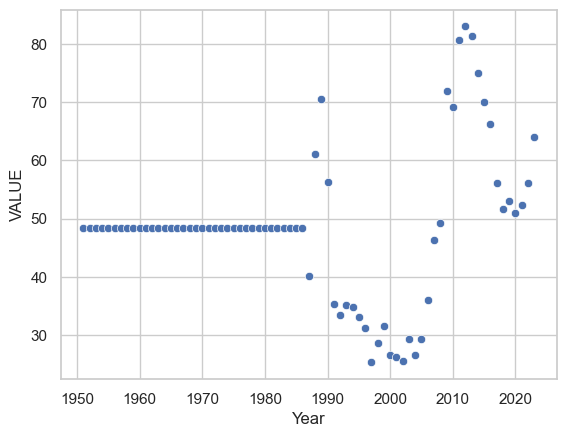

In [266]:
sns.scatterplot(data=filtered_df4, x='Year', y='VALUE')

In [267]:
target_name4 = 'Emigrants'
target_name1 = 'Annual births'
target_name2 = 'Annual deaths'
target_name3 = 'Immigrants'

#df.loc[df['Component'] == target_name, 'VALUE'] = 48.46 
#df.loc[df['Component'] == target_name1, 'VALUE'] = 60.11
#df.loc[df['Component'] == target_name2, 'VALUE'] = 30.66
#df.loc[df['Component'] == target_name3, 'VALUE'] = 65.41
df.loc[df['Component'] == target_name4, 'VALUE'] = np.nan_to_num(df.loc[df['Component'] == target_name4, 'VALUE'], nan=48.46)
df.loc[df['Component'] == target_name1, 'VALUE'] = np.nan_to_num(df.loc[df['Component'] == target_name1, 'VALUE'], nan=60.11)
df.loc[df['Component'] == target_name2, 'VALUE'] = np.nan_to_num(df.loc[df['Component'] == target_name2, 'VALUE'], nan=30.66)
df.loc[df['Component'] == target_name3, 'VALUE'] = np.nan_to_num(df.loc[df['Component'] == target_name3, 'VALUE'], nan=65.41)

# Display the updated DataFrame
#print(df)

In [268]:
df

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,60.11
1,Annual Population Change,1951,Annual deaths,Thousand,30.66
2,Annual Population Change,1951,Natural increase,Thousand,26.60
3,Annual Population Change,1951,Immigrants,Thousand,65.41
4,Annual Population Change,1951,Emigrants,Thousand,48.46
...,...,...,...,...,...
578,Annual Population Change,2023,Natural increase,Thousand,20.00
579,Annual Population Change,2023,Immigrants,Thousand,141.60
580,Annual Population Change,2023,Emigrants,Thousand,64.00
581,Annual Population Change,2023,Net migration,Thousand,77.60


In [269]:
df.groupby(['Component'])['VALUE'].mean().sort_values()

Component
Net migration         1.078082
Natural increase     30.260274
Annual deaths        30.655616
Population change    31.339726
Emigrants            48.459726
Annual births        60.107671
Immigrants           65.407671
Name: VALUE, dtype: float64

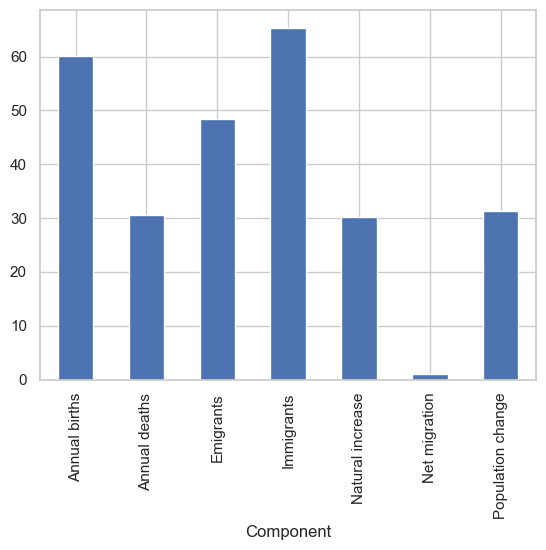

In [270]:
df.groupby(['Component'])['VALUE'].mean().plot.bar();

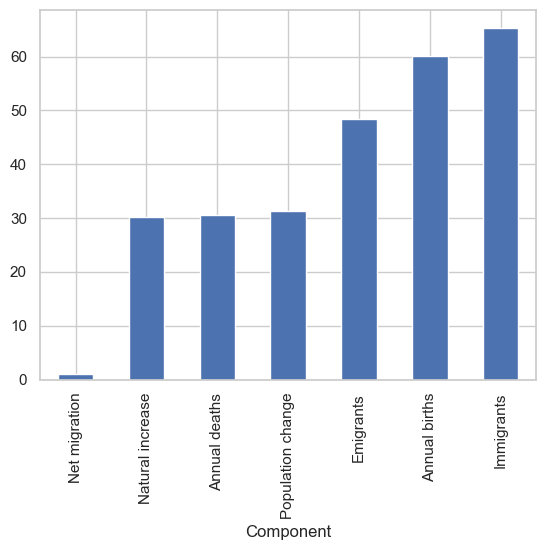

In [271]:
df.groupby(['Component'])['VALUE'].mean().sort_values().plot.bar();

In [272]:
df.isna()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
578,False,False,False,False,False
579,False,False,False,False,False
580,False,False,False,False,False
581,False,False,False,False,False


In [273]:
df[df.Component == 'Emigrants']

,STATISTIC Label,Year,Component,UNIT,VALUE
4,Annual Population Change,1951,Emigrants,Thousand,48.46
12,Annual Population Change,1952,Emigrants,Thousand,48.46
20,Annual Population Change,1953,Emigrants,Thousand,48.46
28,Annual Population Change,1954,Emigrants,Thousand,48.46
36,Annual Population Change,1955,Emigrants,Thousand,48.46
...,...,...,...,...,...
548,Annual Population Change,2019,Emigrants,Thousand,53.10
556,Annual Population Change,2020,Emigrants,Thousand,50.90
564,Annual Population Change,2021,Emigrants,Thousand,52.30
572,Annual Population Change,2022,Emigrants,Thousand,56.10


In [274]:
df[df.Component == 'Emigrants'].iloc[:, [1,4]]

,Year,VALUE
4,1951,48.46
12,1952,48.46
20,1953,48.46
28,1954,48.46
36,1955,48.46
...,...,...
548,2019,53.10
556,2020,50.90
564,2021,52.30
572,2022,56.10


<Axes: xlabel='Year'>

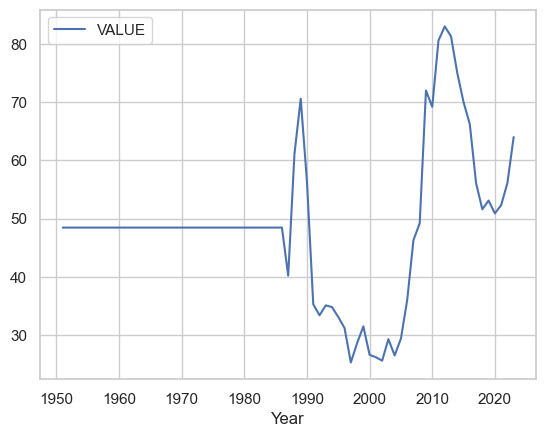

In [275]:
df[df.Component == 'Emigrants'].iloc[:, [1,4]].plot.line(x='Year', y='VALUE')


In [276]:
df[df['Component'].isin([
    'Emigrants',
    'Annual births',
    'Annual deaths',
    'Immigrants',
    'Net Emigration',
])].iloc[:, [1, 4]]

,Year,VALUE
0,1951,60.11
1,1951,30.66
3,1951,65.41
4,1951,48.46
8,1952,60.11
...,...,...
572,2022,56.10
576,2023,55.50
577,2023,35.50
579,2023,141.60


In [277]:
df[df['Component'].isin([
    'Emigrants',
    'Annual births',
    'Annual deaths',
    'Immigrants',
    'Net Emigration',
])].iloc[:, [1, 2, 4]]


,Year,Component,VALUE
0,1951,Annual births,60.11
1,1951,Annual deaths,30.66
3,1951,Immigrants,65.41
4,1951,Emigrants,48.46
8,1952,Annual births,60.11
...,...,...,...
572,2022,Emigrants,56.10
576,2023,Annual births,55.50
577,2023,Annual deaths,35.50
579,2023,Immigrants,141.60


In [278]:
df[df['Component'].isin([
    'Emigrants',
    'Annual births',
    'Annual deaths',
    'Immigrants',
    'Net Emigration',
])].iloc[:, [1, 2, 4]]


,Year,Component,VALUE
0,1951,Annual births,60.11
1,1951,Annual deaths,30.66
3,1951,Immigrants,65.41
4,1951,Emigrants,48.46
8,1952,Annual births,60.11
...,...,...,...
572,2022,Emigrants,56.10
576,2023,Annual births,55.50
577,2023,Annual deaths,35.50
579,2023,Immigrants,141.60


<Axes: xlabel='Year'>

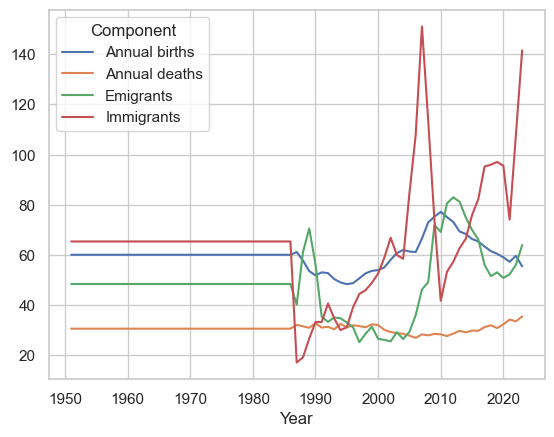

In [279]:
(df[df['Component'].isin([
    'Emigrants',
    'Annual births',
    'Annual deaths',
    'Immigrants',
    'Net Emigration',
])]
.iloc[:, [1, 2, 4]]
.pivot(index='Year', columns='Component', values='VALUE')
.plot.line())


In [280]:
import seaborn as sns

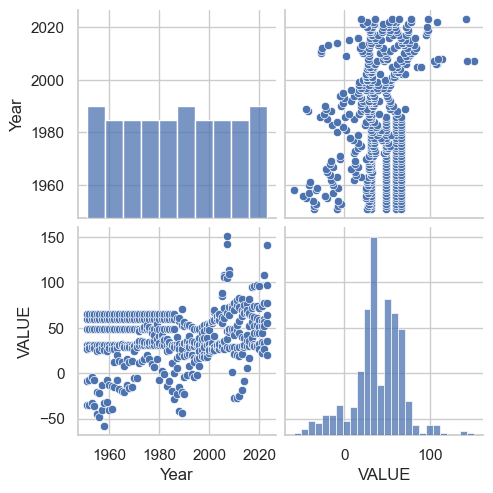

In [281]:
sns.pairplot(df)

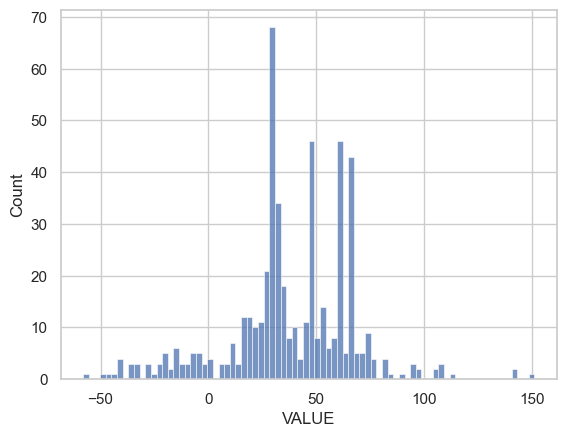

In [282]:
sns.histplot(df['VALUE'], bins=80);

<Axes: xlabel='Year', ylabel='VALUE'>

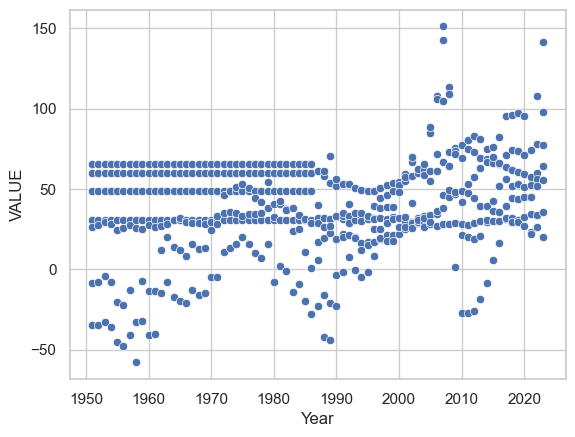

In [283]:
sns.scatterplot(data=df, x='Year', y='VALUE')

In [284]:
df[df['VALUE'] < 1000]

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,60.11
1,Annual Population Change,1951,Annual deaths,Thousand,30.66
2,Annual Population Change,1951,Natural increase,Thousand,26.60
3,Annual Population Change,1951,Immigrants,Thousand,65.41
4,Annual Population Change,1951,Emigrants,Thousand,48.46
...,...,...,...,...,...
578,Annual Population Change,2023,Natural increase,Thousand,20.00
579,Annual Population Change,2023,Immigrants,Thousand,141.60
580,Annual Population Change,2023,Emigrants,Thousand,64.00
581,Annual Population Change,2023,Net migration,Thousand,77.60


In [285]:
#df[df['VALUE'] > 1000]

In [286]:

df_Population = df[df['Component'] == 'Population change']

# Calculate the mean and standard deviation for the 'VALUE' column
mean_value = df_Population['VALUE'].mean()
std_value = df_Population['VALUE'].std()

# Set the number of standard deviations (SD) to consider as a threshold for outliers
num_sd = 2  # Adjust as needed

# Calculate the lower and upper bounds for outliers
lower_bound = mean_value - num_sd * std_value
upper_bound = mean_value + num_sd * std_value

# Identify outliers based on the z-score
outliers = df_Population[(df_Population['VALUE'] < lower_bound) | (df_Population['VALUE'] > upper_bound)]

# Display the outliers
print(outliers)


              STATISTIC Label  Year          Component      UNIT  VALUE
446  Annual Population Change  2006  Population change  Thousand  106.0
454  Annual Population Change  2007  Population change  Thousand  142.9
462  Annual Population Change  2008  Population change  Thousand  109.2


In [287]:

df_Emigrants = df[df['Component'] == 'Emigrants']

# Calculate the mean and standard deviation for the 'VALUE' column
mean_value = df_Emigrants['VALUE'].mean()
std_value = df_Emigrants['VALUE'].std()

# Set the number of standard deviations (SD) to consider as a threshold for outliers
num_sd = 2  # Adjust as needed

# Calculate the lower and upper bounds for outliers
lower_bound = mean_value - num_sd * std_value
upper_bound = mean_value + num_sd * std_value

# Identify outliers based on the z-score
outliers = df_Emigrants[(df_Emigrants['VALUE'] < lower_bound) | (df_Emigrants['VALUE'] > upper_bound)]

# Display the outliers
print(outliers)





              STATISTIC Label  Year  Component      UNIT  VALUE
484  Annual Population Change  2011  Emigrants  Thousand   80.6
492  Annual Population Change  2012  Emigrants  Thousand   83.0
500  Annual Population Change  2013  Emigrants  Thousand   81.3
508  Annual Population Change  2014  Emigrants  Thousand   75.0


In [288]:
df.describe()

,Year,VALUE
count,511.000000,511.000000
mean,1987.000000,38.186967
std,21.091956,29.015634
min,1951.000000,-58.000000
25%,1969.000000,26.750000
50%,1987.000000,35.500000
75%,2005.000000,60.110000
max,2023.000000,151.100000


In [289]:
df.head(5)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,60.11
1,Annual Population Change,1951,Annual deaths,Thousand,30.66
2,Annual Population Change,1951,Natural increase,Thousand,26.60
3,Annual Population Change,1951,Immigrants,Thousand,65.41
4,Annual Population Change,1951,Emigrants,Thousand,48.46


In [290]:
df.tail(5)

,STATISTIC Label,Year,Component,UNIT,VALUE
578,Annual Population Change,2023,Natural increase,Thousand,20.0
579,Annual Population Change,2023,Immigrants,Thousand,141.6
580,Annual Population Change,2023,Emigrants,Thousand,64.0
581,Annual Population Change,2023,Net migration,Thousand,77.6
582,Annual Population Change,2023,Population change,Thousand,97.6


In [291]:
Data_clean = df

In [292]:
#Data_clean.to_pickle('Data_clean.pkl')

In [293]:
Immigrants = len(df[df['Component'] == 1]) #checking features of various attributes
Emigrants = len(df[df['Component'] == 0])

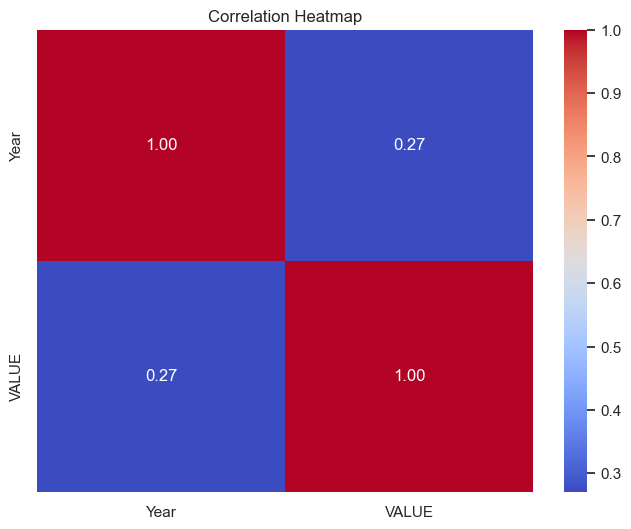

In [294]:
# Select columns for correlation
columns_to_correlate = ['Year', 'Component', 'VALUE']

# Calculate the correlation matrix
correlation_matrix = Data_clean[columns_to_correlate].corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

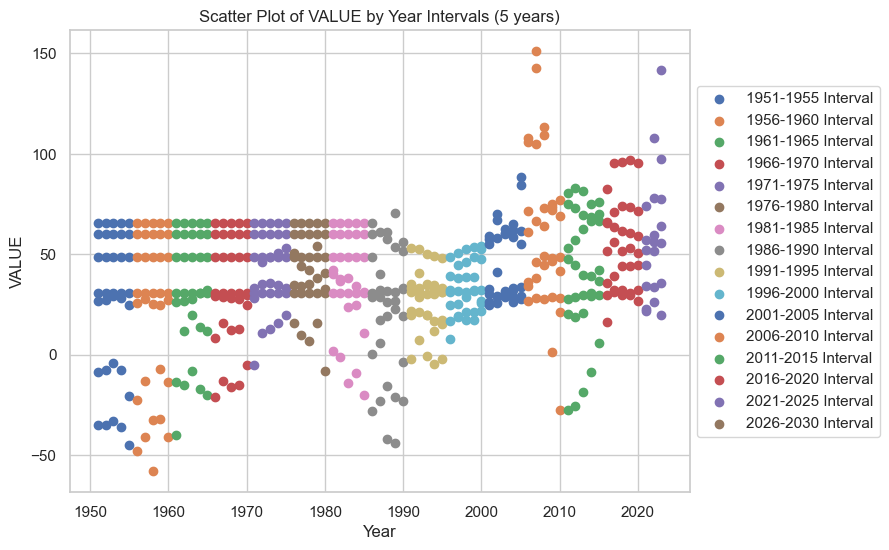

In [295]:
# Create a DataFrame from the sample data
df1 = pd.DataFrame(df)

# Define the intervals (every 5 years)
interval_size = 5
min_year = min(df1['Year'])
max_year = max(df1['Year'])
intervals = range(min_year, max_year + interval_size, interval_size)

# Create scatter plots for 'VALUE' and 'Year' within each interval
plt.figure(figsize=(8, 6))
plt.title('Scatter Plot of VALUE by Year Intervals (5 years)')
plt.xlabel('Year')
plt.ylabel('VALUE')

for start in intervals:
    interval_data = df1[(df1['Year'] >= start) & (df1['Year'] < start + interval_size)]
    plt.scatter(interval_data['Year'], interval_data['VALUE'], label=f'{start}-{start+interval_size-1} Interval')

# Place the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




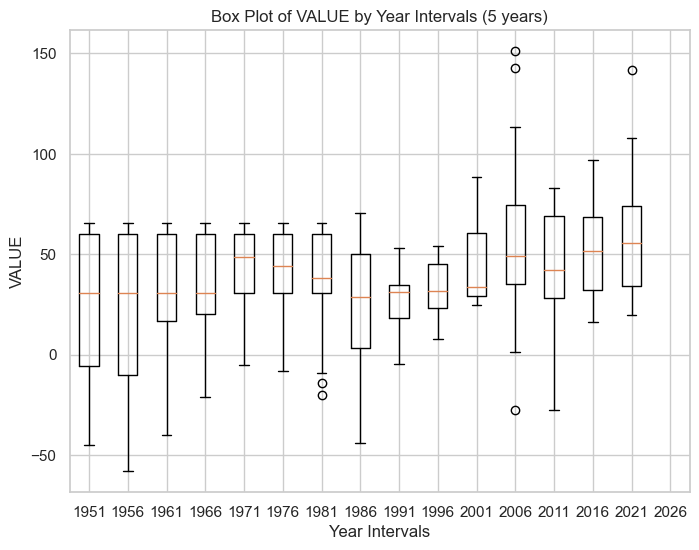

In [296]:

# Create a DataFrame from the sample data
df1 = pd.DataFrame(df)

# Define the intervals (every 5 years)
interval_size = 5
min_year = min(df1['Year'])
max_year = max(df1['Year'])
intervals = range(min_year, max_year + interval_size, interval_size)

# Create a box plot for 'VALUE' separated by year intervals
plt.figure(figsize=(8, 6))
plt.title('Box Plot of VALUE by Year Intervals (5 years)')
plt.xlabel('Year Intervals')
plt.ylabel('VALUE')
plt.boxplot([df1[(df1['Year'] >= start) & (df['Year'] < start + interval_size)]['VALUE'] for start in intervals], labels=intervals)
plt.show()




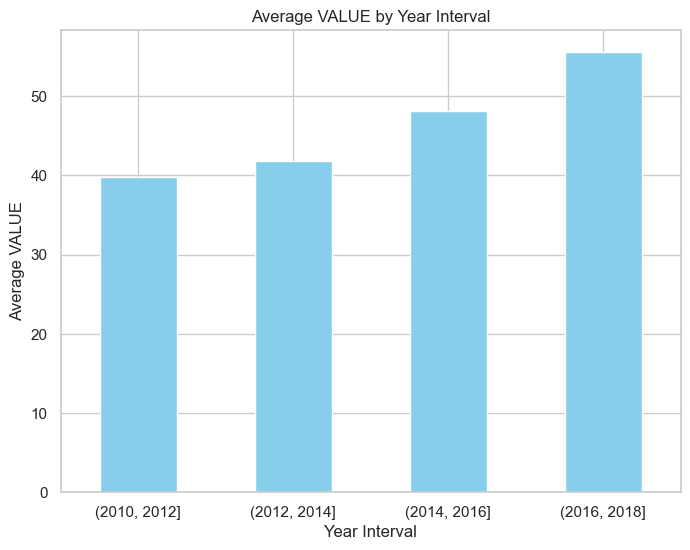

In [297]:

df2 = pd.DataFrame(df1)

# Define the bins (intervals) for the years
bins = [2010, 2012, 2014, 2016, 2018]

# Cutting the 'Year' data into intervals and computing the average 'VALUE' within each interval
df2['Year Interval'] = pd.cut(df2['Year'], bins)
average_values = df2.groupby('Year Interval')['VALUE'].mean()

# Create a bar chart to show the correlation between 'Year' and 'VALUE'
plt.figure(figsize=(8, 6))
average_values.plot(kind='bar', color='skyblue')
plt.title('Average VALUE by Year Interval')
plt.xlabel('Year Interval')
plt.ylabel('Average VALUE')
plt.xticks(rotation=0)
plt.show()



In [298]:
df2.head(5)

,STATISTIC Label,Year,Component,UNIT,VALUE,Year Interval
0,Annual Population Change,1951,Annual births,Thousand,60.11,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,30.66,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.60,NaN
3,Annual Population Change,1951,Immigrants,Thousand,65.41,NaN
4,Annual Population Change,1951,Emigrants,Thousand,48.46,NaN


In [299]:
# RemovYear Interval name
column_name = 'Year Interval'
df = df2.drop('Year Interval', axis=1)

In [300]:
df.head(5)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,60.11
1,Annual Population Change,1951,Annual deaths,Thousand,30.66
2,Annual Population Change,1951,Natural increase,Thousand,26.60
3,Annual Population Change,1951,Immigrants,Thousand,65.41
4,Annual Population Change,1951,Emigrants,Thousand,48.46


# Exploring the Population dataset with House Price and Inflation rate dataset

In [301]:
df = pd.read_csv('PEA15.20231014T151028.csv')

In [302]:
df.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [303]:
df = df.dropna()


In [304]:
df.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
2,Annual Population Change,1951,Natural increase,Thousand,26.6
5,Annual Population Change,1951,Net migration,Thousand,-35.0
6,Annual Population Change,1951,Population change,Thousand,-8.4
7,Annual Population Change,1951,Population,Thousand,2960.6
10,Annual Population Change,1952,Natural increase,Thousand,27.3


In [305]:
df.isna()

,STATISTIC Label,Year,Component,UNIT,VALUE
2,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
10,False,False,False,False,False
...,...,...,...,...,...
579,False,False,False,False,False
580,False,False,False,False,False
581,False,False,False,False,False
582,False,False,False,False,False


In [403]:
value_to_drop = 'Population'

df = df[df['Component'] != value_to_drop]
print(df)

              STATISTIC Label  Year          Component      UNIT  VALUE
0    Annual Population Change  2005      Annual births  Thousand   61.4
1    Annual Population Change  2005      Annual deaths  Thousand   27.9
2    Annual Population Change  2005   Natural increase  Thousand   33.5
3    Annual Population Change  2005         Immigrants  Thousand   84.6
4    Annual Population Change  2005          Emigrants  Thousand   29.4
..                        ...   ...                ...       ...    ...
146  Annual Population Change  2023   Natural increase  Thousand   20.0
147  Annual Population Change  2023         Immigrants  Thousand  141.6
148  Annual Population Change  2023          Emigrants  Thousand   64.0
149  Annual Population Change  2023      Net migration  Thousand   77.6
150  Annual Population Change  2023  Population change  Thousand   97.6

[133 rows x 5 columns]


In [404]:
# Remove rows where 'Year' is between 1987 and 2004 (inclusive)
df = df[~df['Year'].between(1951, 2004)]
# Reset the index
df = df.reset_index(drop=True)

In [405]:
df.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,2005,Annual births,Thousand,61.4
1,Annual Population Change,2005,Annual deaths,Thousand,27.9
2,Annual Population Change,2005,Natural increase,Thousand,33.5
3,Annual Population Change,2005,Immigrants,Thousand,84.6
4,Annual Population Change,2005,Emigrants,Thousand,29.4


In [406]:
# Pivot the DataFrame
pivoted_df = df.pivot(index=['STATISTIC Label', 'Year'], columns='Component', values='VALUE')

# Reset index to make 'STATISTIC Label' and 'Year' columns again
pivoted_df.reset_index(inplace=True)

# Display the pivoted DataFrame
print(pivoted_df)

Component           STATISTIC Label  Year  Annual births  Annual deaths  \
0          Annual Population Change  2005           61.4           27.9   
1          Annual Population Change  2006           61.2           27.0   
2          Annual Population Change  2007           66.6           28.4   
3          Annual Population Change  2008           73.0           28.0   
4          Annual Population Change  2009           75.3           28.6   
5          Annual Population Change  2010           77.2           28.4   
6          Annual Population Change  2011           75.1           27.7   
7          Annual Population Change  2012           73.2           28.7   
8          Annual Population Change  2013           69.4           29.8   
9          Annual Population Change  2014           68.4           29.2   
10         Annual Population Change  2015           66.4           29.9   
11         Annual Population Change  2016           65.4           29.8   
12         Annual Populat

In [407]:
pivoted_df.head(18)

Component,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3
5,Annual Population Change,2010,77.2,28.4,69.2,41.8,48.8,-27.5,21.4
6,Annual Population Change,2011,75.1,27.7,80.6,53.3,47.5,-27.4,20.1
7,Annual Population Change,2012,73.2,28.7,83.0,57.3,44.5,-25.7,18.8
8,Annual Population Change,2013,69.4,29.8,81.3,62.7,39.6,-18.7,21.0
9,Annual Population Change,2014,68.4,29.2,75.0,66.5,39.2,-8.5,30.8


In [408]:
# Generate a primary key or unique identifier column
unique_id = []
for i in range(1, len(pivoted_df) + 1):
     unique_id.append(i)
pivoted_df['ID'] = unique_id

In [409]:
pivoted_df

Component,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,ID
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,1
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,2
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,3
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,4
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,5
5,Annual Population Change,2010,77.2,28.4,69.2,41.8,48.8,-27.5,21.4,6
6,Annual Population Change,2011,75.1,27.7,80.6,53.3,47.5,-27.4,20.1,7
7,Annual Population Change,2012,73.2,28.7,83.0,57.3,44.5,-25.7,18.8,8
8,Annual Population Change,2013,69.4,29.8,81.3,62.7,39.6,-18.7,21.0,9
9,Annual Population Change,2014,68.4,29.2,75.0,66.5,39.2,-8.5,30.8,10


In [410]:
import pandas as pd
df_HP = pd.read_csv('HousePriceIndex.csv')

In [411]:
df_HP.tail(50)

,Unnamed: 0,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index
0,"Source: Central Statistics Office, Ireland.",NaN,NaN
1,2005,131.8,9.3
2,2006,151.4,14.9
3,2007,162.7,7.5
4,2008,151.4,-6.9
5,2009,122.4,-19.1
6,2010,106.0,-13.4
7,2011,87.9,-17.1
8,2012,76.0,-13.5
9,2013,77.0,1.2


In [412]:
# Remove a row by index
index_to_remove = 0  # Index of the row to remove
House_Price_Index = df_HP.drop(index_to_remove)
# Reset the index
House_Price_Index = House_Price_Index.reset_index(drop=True)

In [413]:
House_Price_Index.head()


,Unnamed: 0,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index
0,2005,131.8,9.3
1,2006,151.4,14.9
2,2007,162.7,7.5
3,2008,151.4,-6.9
4,2009,122.4,-19.1


In [414]:
# Rename a column
new_column_name = 'Year'
House_Price_Index = House_Price_Index.rename(columns={'Unnamed: 0': new_column_name})

In [415]:
House_Price_Index

,Year,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index
0,2005,131.8,9.3
1,2006,151.4,14.9
2,2007,162.7,7.5
3,2008,151.4,-6.9
4,2009,122.4,-19.1
5,2010,106.0,-13.4
6,2011,87.9,-17.1
7,2012,76.0,-13.5
8,2013,77.0,1.2
9,2014,89.7,16.5


In [416]:
House_Price_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Year                                                                   18 non-null     object 
 1   Residential Property Price Index                                       18 non-null     float64
 2   Percentage Change over 12 months for Residential Property Price Index  18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 564.0+ bytes


In [417]:
# Alternatively, you can use a for loop to generate unique values
unique_id = []
for i in range(1, len(House_Price_Index) + 1):
     unique_id.append(i)
House_Price_Index['ID'] = unique_id

In [418]:
House_Price_Index.head()


,Year,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,ID
0,2005,131.8,9.3,1
1,2006,151.4,14.9,2
2,2007,162.7,7.5,3
3,2008,151.4,-6.9,4
4,2009,122.4,-19.1,5


In [419]:
#df_HP= df_HP['Year'].astype(int)

In [420]:
# Perform an inner join on the 'ID' column
merged_df = pd.merge(pivoted_df, House_Price_Index, on='ID', how='inner')

In [421]:
merged_df.tail()

,STATISTIC Label,Year_x,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,ID,Year_y,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index
13,Annual Population Change,2018,61.6,32.0,51.6,96.0,29.6,44.4,74.0,14,2018,131.3,10.2
14,Annual Population Change,2019,60.5,30.9,53.1,97.1,29.6,44.0,73.6,15,2019,134.4,2.3
15,Annual Population Change,2020,59.1,32.4,50.9,95.6,26.7,44.7,71.4,16,2020,134.8,0.3
16,Annual Population Change,2021,57.3,34.3,52.3,74.1,23.0,21.8,44.8,17,2021,146.0,8.3
17,Annual Population Change,2022,59.7,33.6,56.1,107.8,26.1,51.7,77.8,18,2022,164.0,12.3


In [422]:
import pandas as pd

# Specify the encoding when reading the CSV file
df_inflation = pd.read_csv('inflation_data.csv', encoding='latin1')  # Change 'latin1' to the appropriate encoding



In [423]:
df_inflation.head()

,Year,Euro Value,Inflation Rate
0,1956, 100.00,2.38%
1,1957, 105.86,5.86%
2,1958, 108.74,2.72%
3,1959, 107.99,-0.69%
4,1960, 108.48,0.45%


In [424]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            68 non-null     int64 
 1   Euro Value      68 non-null     object
 2   Inflation Rate  68 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


In [425]:
# Remove rows where 'Year' is between 1987 and 2004 (inclusive)
df_inflation = df_inflation[~df_inflation['Year'].between(1956, 2004)]
# Reset the index
df_inflation = df_inflation.reset_index(drop=True)

In [426]:
df_inflation.head()

,Year,Euro Value,Inflation Rate
0,2005," 1,991.54",2.43%
1,2006," 2,069.84",3.93%
2,2007," 2,171.21",4.90%
3,2008," 2,259.36",4.06%
4,2009," 2,158.19",-4.48%


In [427]:
# Remove a row by index
index_to_remove = 18  # Index of the row to remove
df_inflation = df_inflation.drop(index_to_remove)
# Reset the index
df_inflation = df_inflation.reset_index(drop=True)

In [428]:
df_inflation.tail()

,Year,Euro Value,Inflation Rate
13,2018," 2,257.88",0.49%
14,2019," 2,279.08",0.94%
15,2020," 2,271.45",-0.33%
16,2021," 2,325.02",2.36%
17,2022," 2,506.54",7.81%


In [429]:
# Generate a primary key or unique identifier column
unique_id = []
for i in range(1, len(df_inflation) + 1):
     unique_id.append(i)
df_inflation['ID'] = unique_id

In [430]:
df_inflation.head()

,Year,Euro Value,Inflation Rate,ID
0,2005," 1,991.54",2.43%,1
1,2006," 2,069.84",3.93%,2
2,2007," 2,171.21",4.90%,3
3,2008," 2,259.36",4.06%,4
4,2009," 2,158.19",-4.48%,5


In [431]:
# Remove the 'Euro Value column
df_inflation = df_inflation.drop('Euro Value', axis=1)
df_inflation

,Year,Inflation Rate,ID
0,2005,2.43%,1
1,2006,3.93%,2
2,2007,4.90%,3
3,2008,4.06%,4
4,2009,-4.48%,5
5,2010,-0.92%,6
6,2011,2.56%,7
7,2012,1.70%,8
8,2013,0.51%,9
9,2014,0.18%,10


In [432]:
df_inflation.head()

,Year,Inflation Rate,ID
0,2005,2.43%,1
1,2006,3.93%,2
2,2007,4.90%,3
3,2008,4.06%,4
4,2009,-4.48%,5


In [433]:
# Perform an inner join on the 'ID' column
merged_df2 = pd.merge(merged_df, df_inflation, on='ID', how='inner')

In [434]:
merged_df2.head()

,STATISTIC Label,Year_x,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,ID,Year_y,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Year,Inflation Rate
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,1,2005,131.8,9.3,2005,2.43%
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,2,2006,151.4,14.9,2006,3.93%
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,3,2007,162.7,7.5,2007,4.90%
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,4,2008,151.4,-6.9,2008,4.06%
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,5,2009,122.4,-19.1,2009,-4.48%


In [435]:
# Remove the 'ID' and 'Year_y' columns
columns_to_remove = ['ID', 'Year_y']
merged_df2 = merged_df2.drop(columns_to_remove, axis=1)

In [436]:
merged_df2.head()

,STATISTIC Label,Year_x,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Year,Inflation Rate
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,131.8,9.3,2005,2.43%
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,151.4,14.9,2006,3.93%
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,162.7,7.5,2007,4.90%
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,151.4,-6.9,2008,4.06%
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,122.4,-19.1,2009,-4.48%


In [437]:
columns_to_remove = ['Year']
merged_df2 = merged_df2.drop(columns_to_remove, axis=1)

In [438]:
merged_df2 

,STATISTIC Label,Year_x,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Inflation Rate
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,131.8,9.3,2.43%
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,151.4,14.9,3.93%
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,162.7,7.5,4.90%
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,151.4,-6.9,4.06%
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,122.4,-19.1,-4.48%
5,Annual Population Change,2010,77.2,28.4,69.2,41.8,48.8,-27.5,21.4,106.0,-13.4,-0.92%
6,Annual Population Change,2011,75.1,27.7,80.6,53.3,47.5,-27.4,20.1,87.9,-17.1,2.56%
7,Annual Population Change,2012,73.2,28.7,83.0,57.3,44.5,-25.7,18.8,76.0,-13.5,1.70%
8,Annual Population Change,2013,69.4,29.8,81.3,62.7,39.6,-18.7,21.0,77.0,1.2,0.51%
9,Annual Population Change,2014,68.4,29.2,75.0,66.5,39.2,-8.5,30.8,89.7,16.5,0.18%


In [439]:
 merged_df2.rename(columns={'Year_x': 'Year'}, inplace=True)

In [440]:
merged_df2.head()

,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Inflation Rate
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,131.8,9.3,2.43%
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,151.4,14.9,3.93%
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,162.7,7.5,4.90%
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,151.4,-6.9,4.06%
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,122.4,-19.1,-4.48%


In [441]:
merged_df2.to_pickle('Merged_data.pkl')

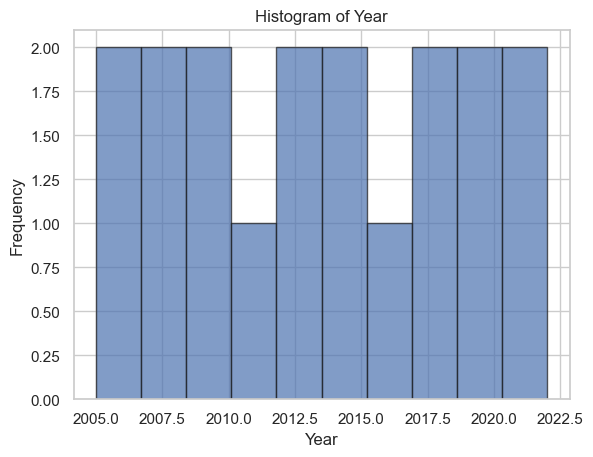

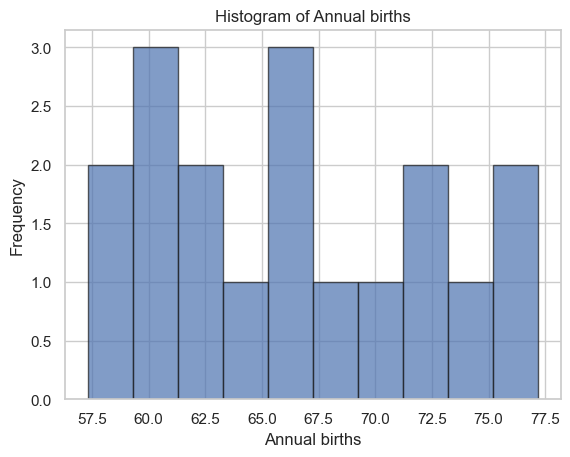

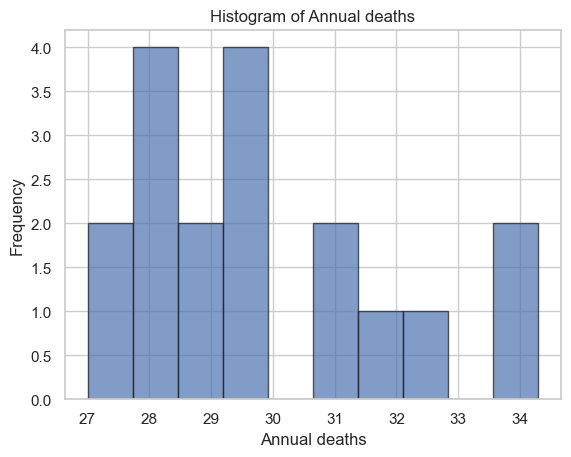

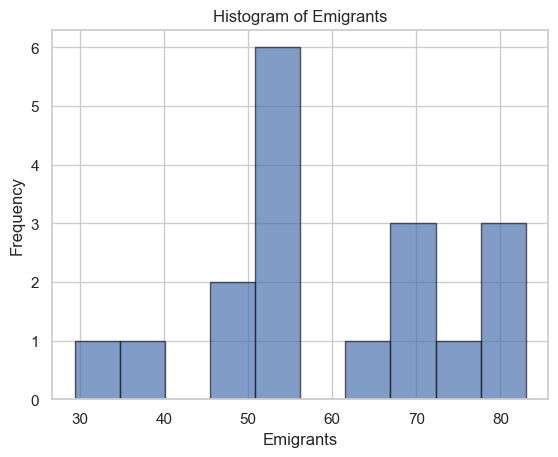

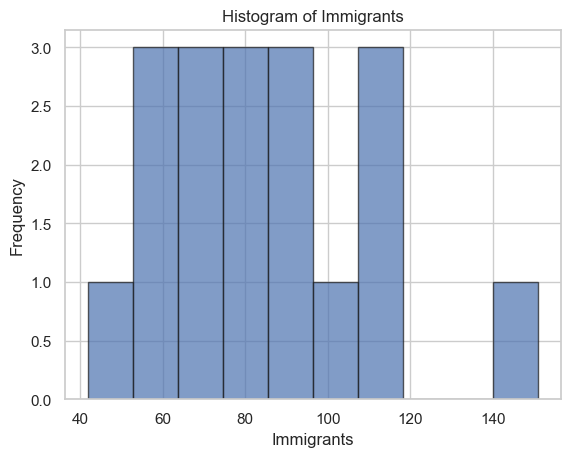

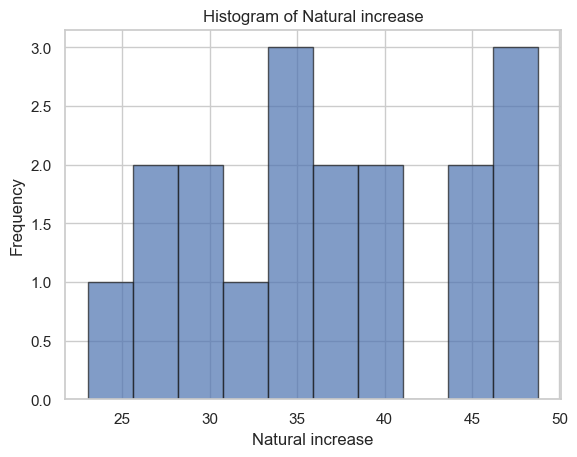

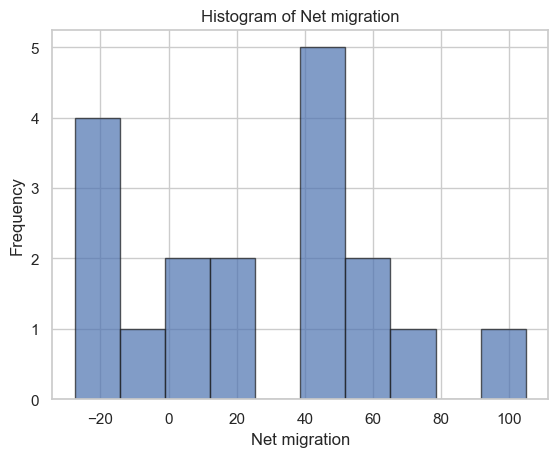

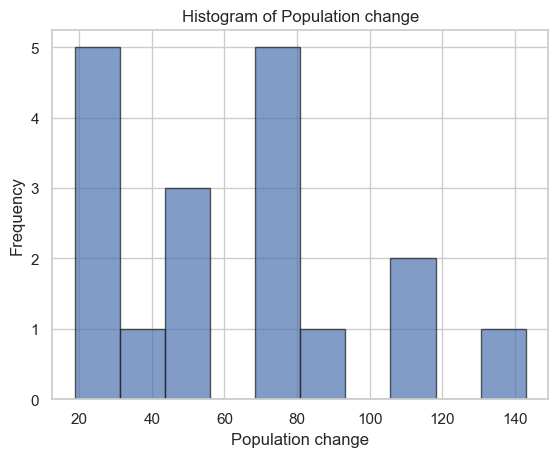

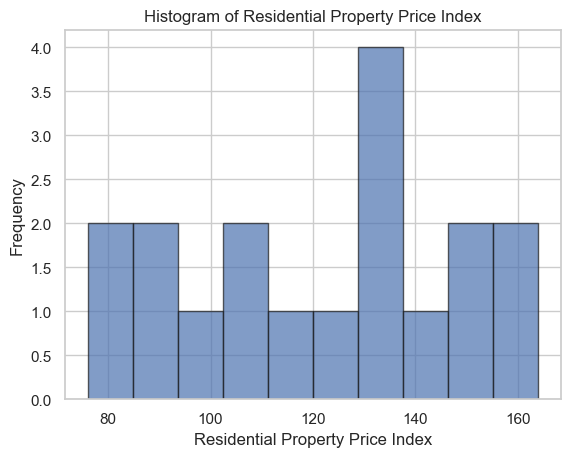

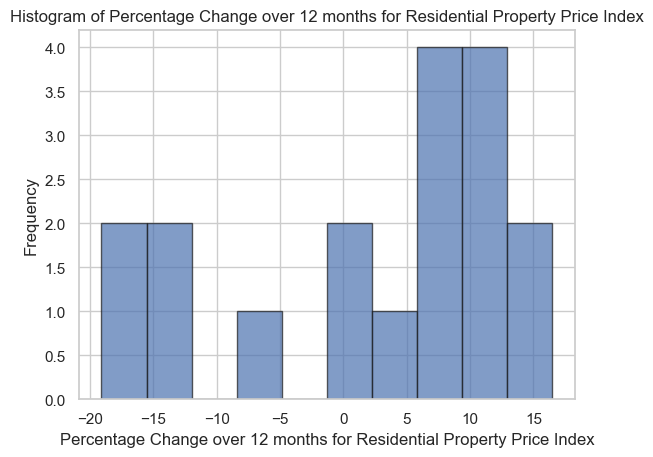

In [442]:
# Plot histograms for all columns
for column in merged_df2.columns:
    if merged_df2[column].dtype in ['int64', 'float64']:  # Check if the column contains numeric data
        plt.hist(merged_df2[column], bins=10, edgecolor='k', alpha=0.7)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.grid(True)
        plt.show()

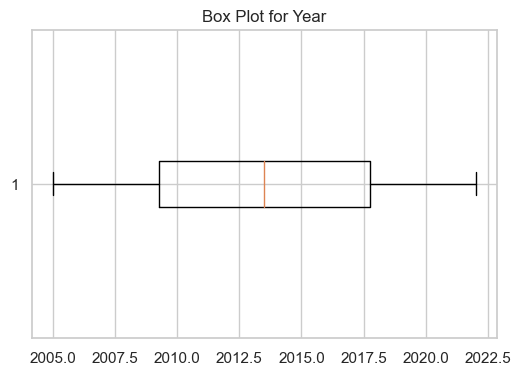

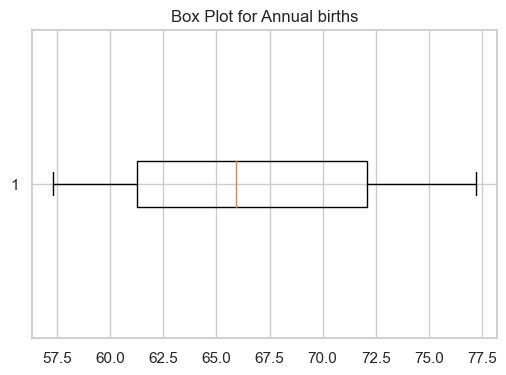

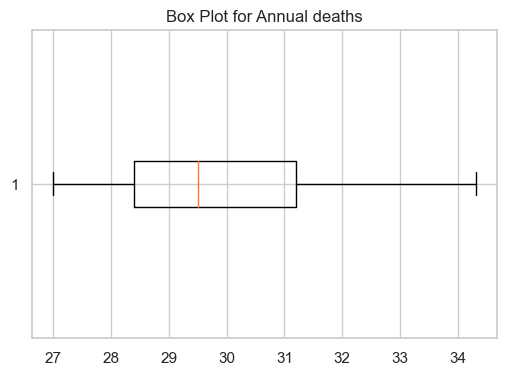

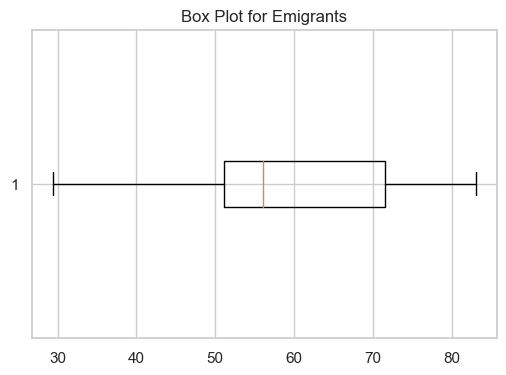

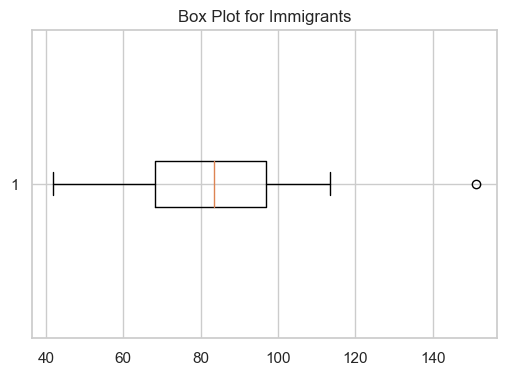

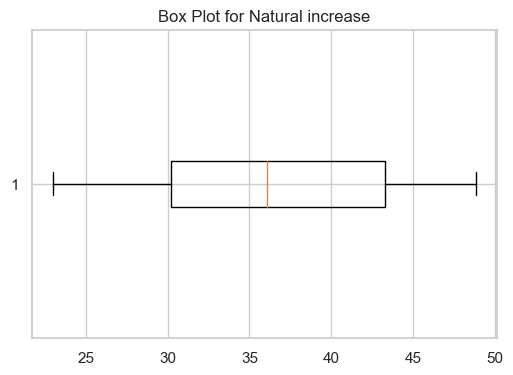

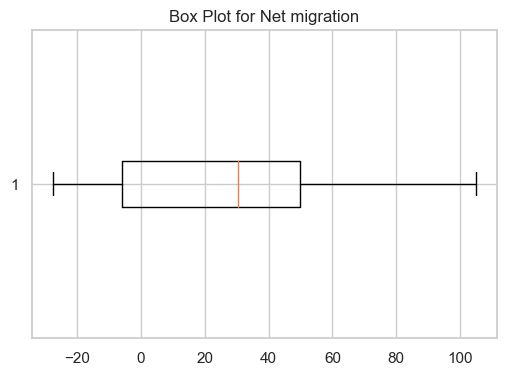

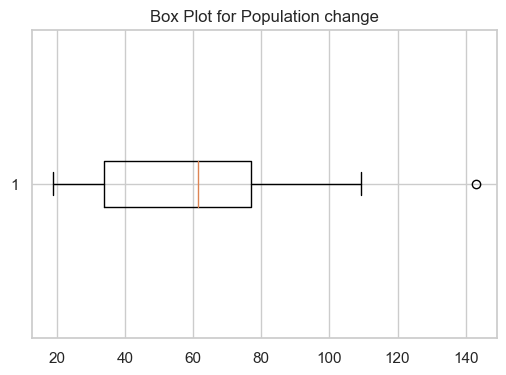

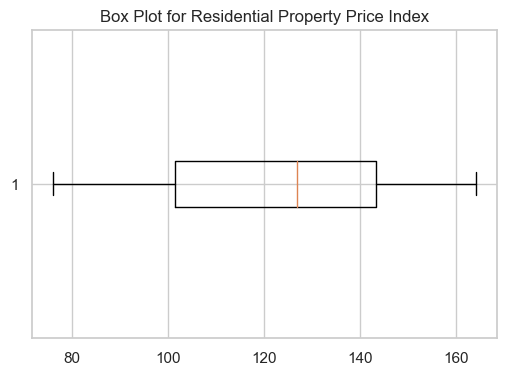

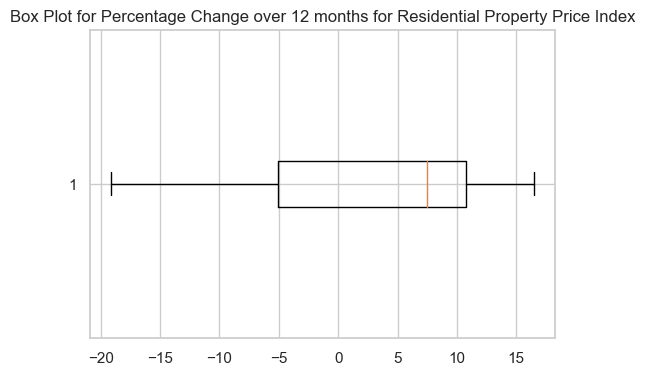

In [444]:
# Select numeric columns
numeric_columns = merged_df2.select_dtypes(include=['int64', 'float64'])

# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(merged_df2[column], vert=False)
    plt.title(f'Box Plot for {column}')
    plt.show()

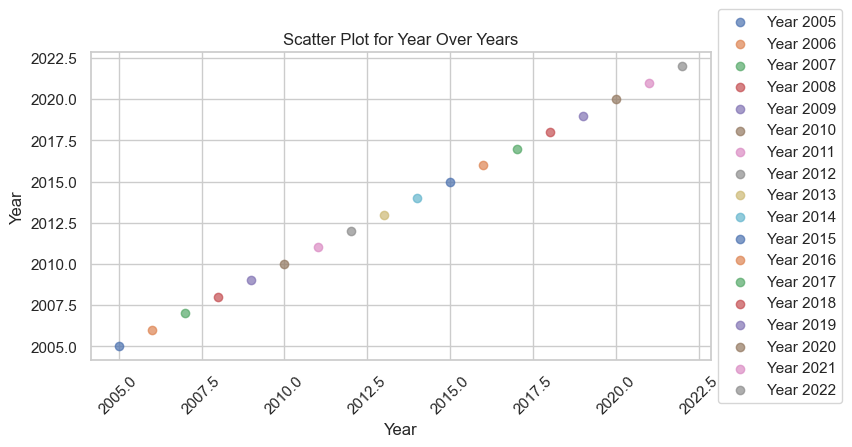

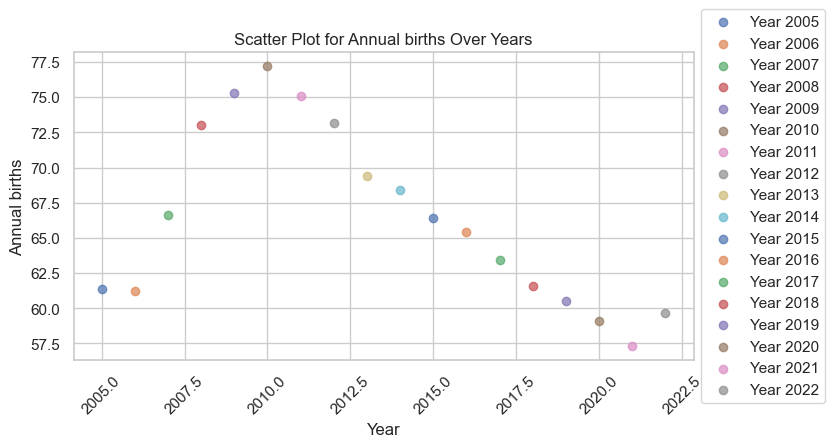

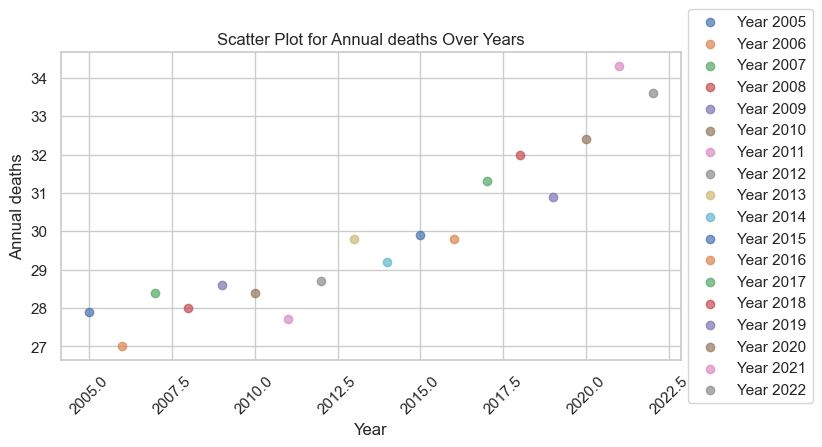

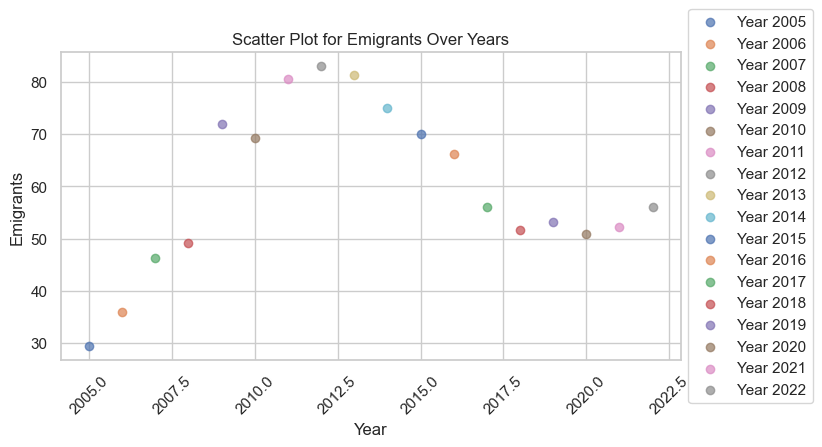

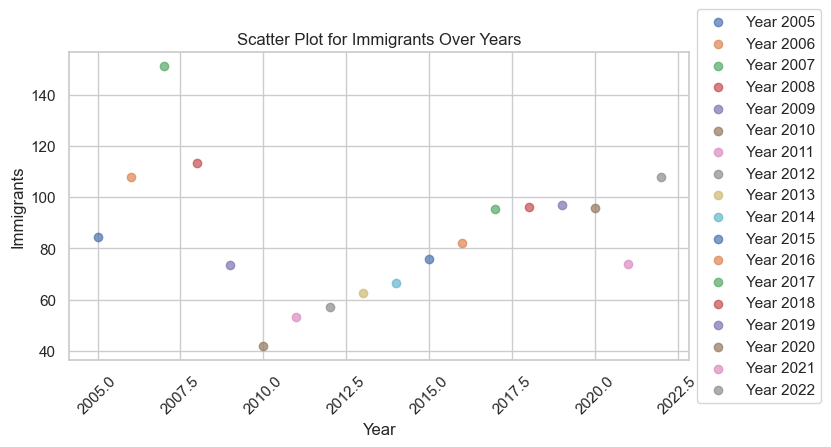

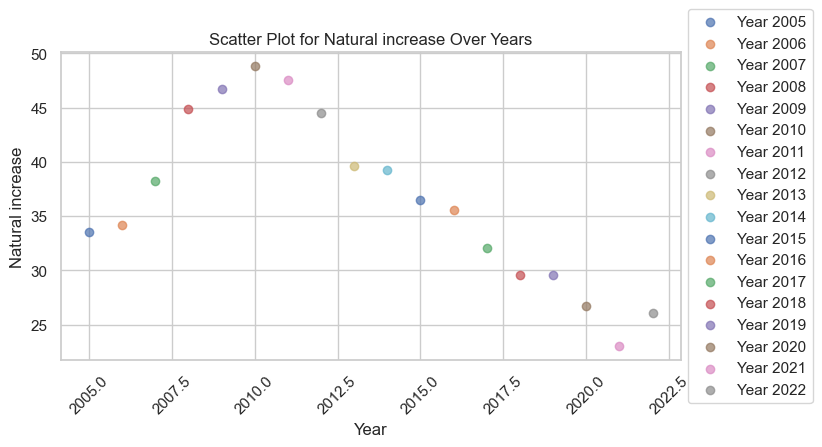

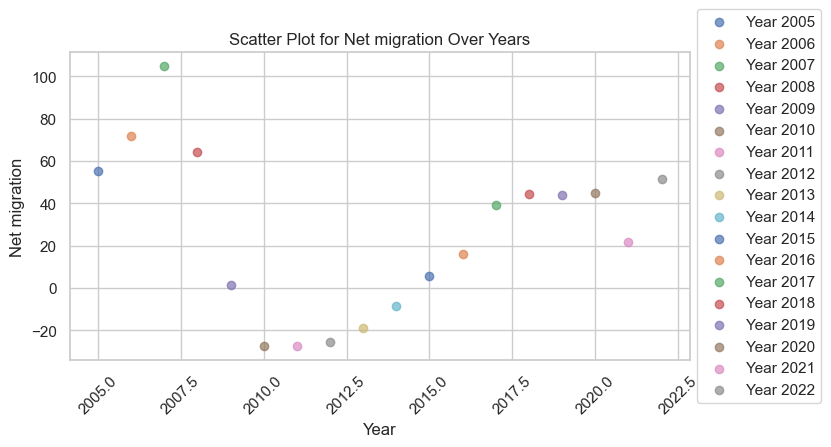

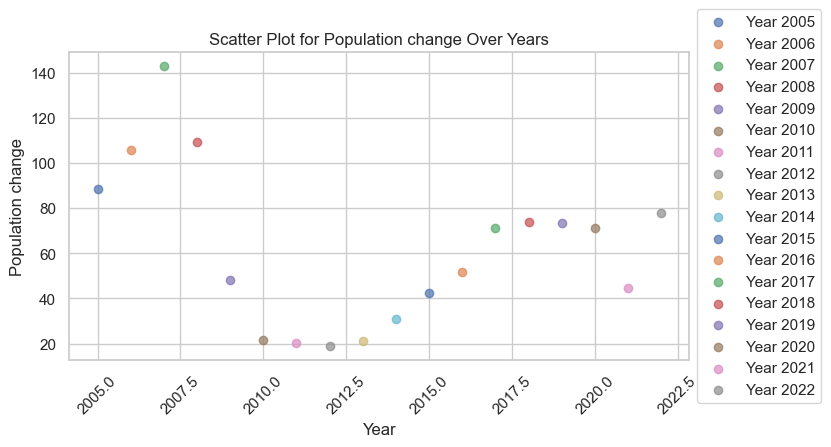

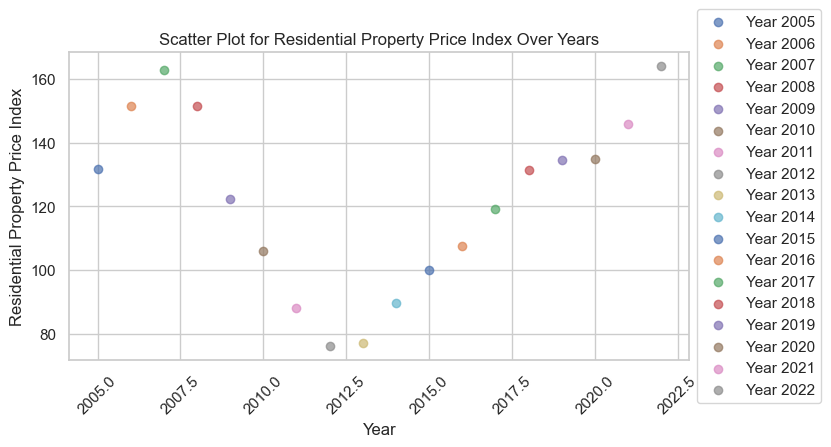

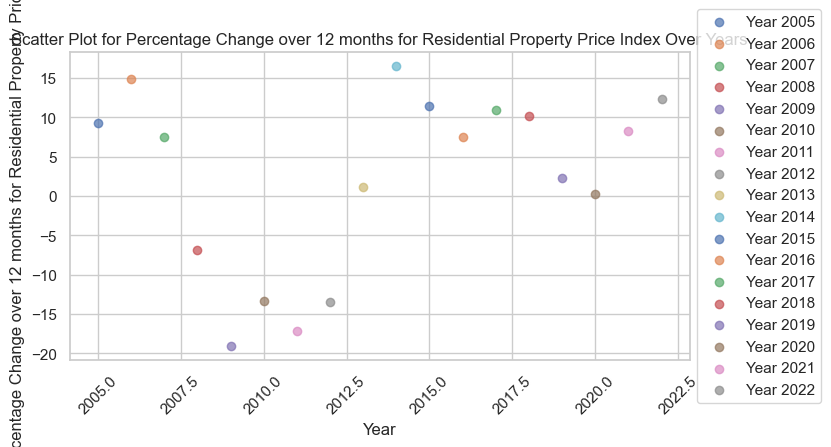

In [445]:
numeric_columns = merged_df2.select_dtypes(include=['int64', 'float64'])

# Create scatter plots for each numeric column with 'Year' on the x-axis
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    for year in merged_df2['Year'].unique():
        data = merged_df2[merged_df2['Year'] == year]
        plt.scatter(data['Year'], data[column], label=f'Year {year}', alpha=0.7)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move the legend to the right
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Scatter Plot for {column} Over Years')
    plt.grid(True)
    plt.show()



C:\Users\t_all\AppData\Local\Temp\ipykernel_6820\1799858192.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df2.corr()


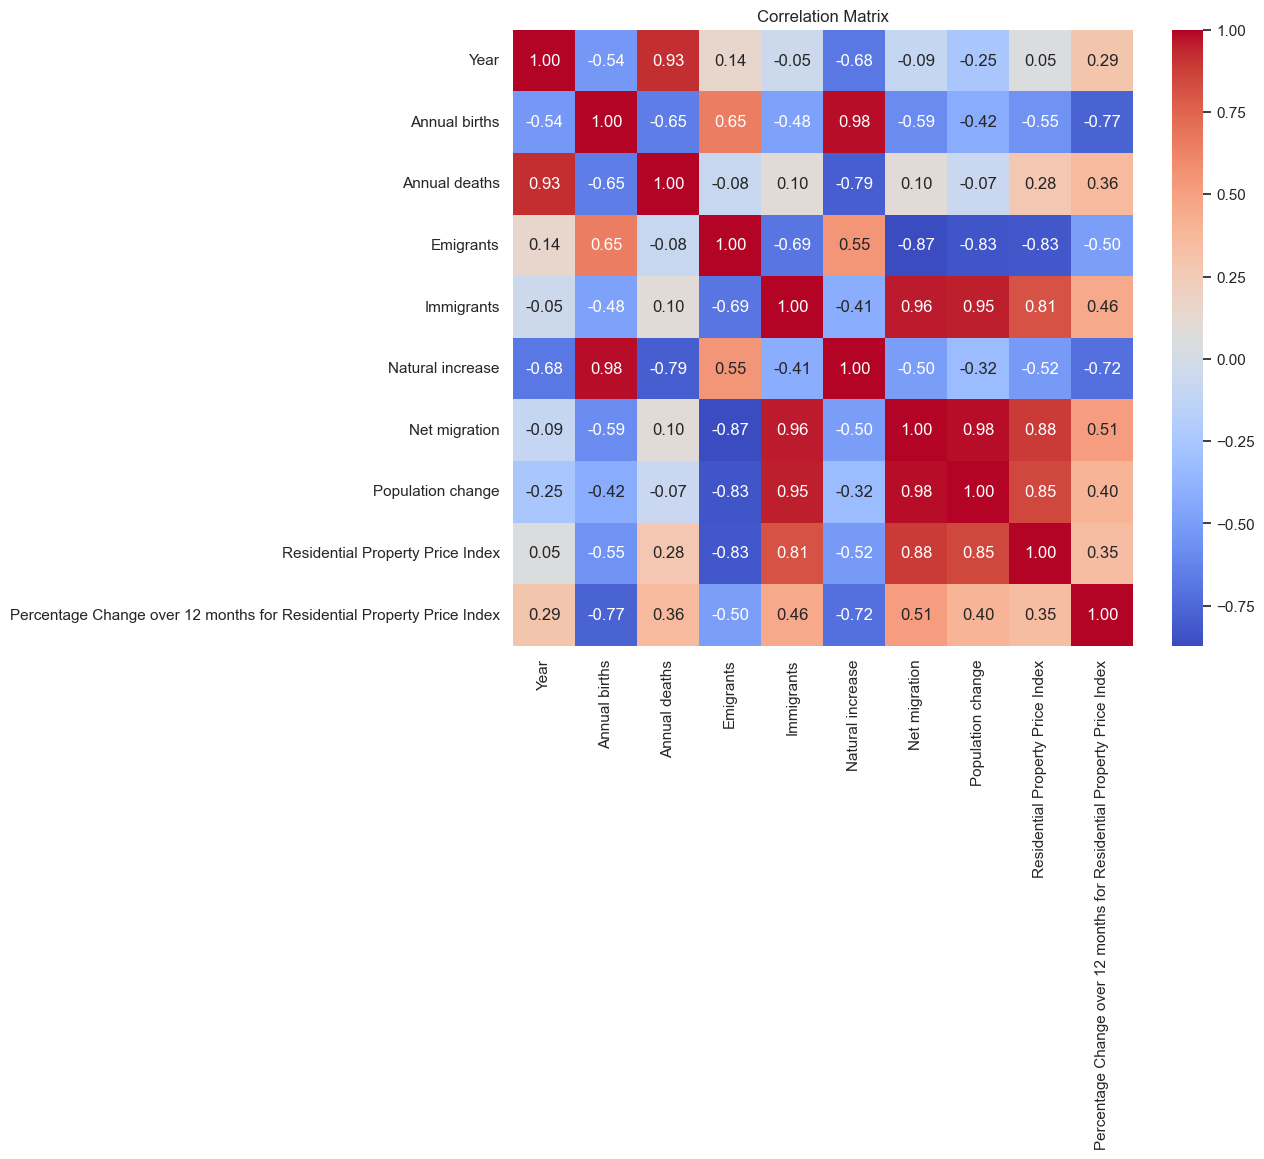

In [446]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = merged_df2.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [447]:
merged_df2.head(18)

,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Inflation Rate
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,131.8,9.3,2.43%
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,151.4,14.9,3.93%
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,162.7,7.5,4.90%
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,151.4,-6.9,4.06%
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,122.4,-19.1,-4.48%
5,Annual Population Change,2010,77.2,28.4,69.2,41.8,48.8,-27.5,21.4,106.0,-13.4,-0.92%
6,Annual Population Change,2011,75.1,27.7,80.6,53.3,47.5,-27.4,20.1,87.9,-17.1,2.56%
7,Annual Population Change,2012,73.2,28.7,83.0,57.3,44.5,-25.7,18.8,76.0,-13.5,1.70%
8,Annual Population Change,2013,69.4,29.8,81.3,62.7,39.6,-18.7,21.0,77.0,1.2,0.51%
9,Annual Population Change,2014,68.4,29.2,75.0,66.5,39.2,-8.5,30.8,89.7,16.5,0.18%


KeyError: 'Population'

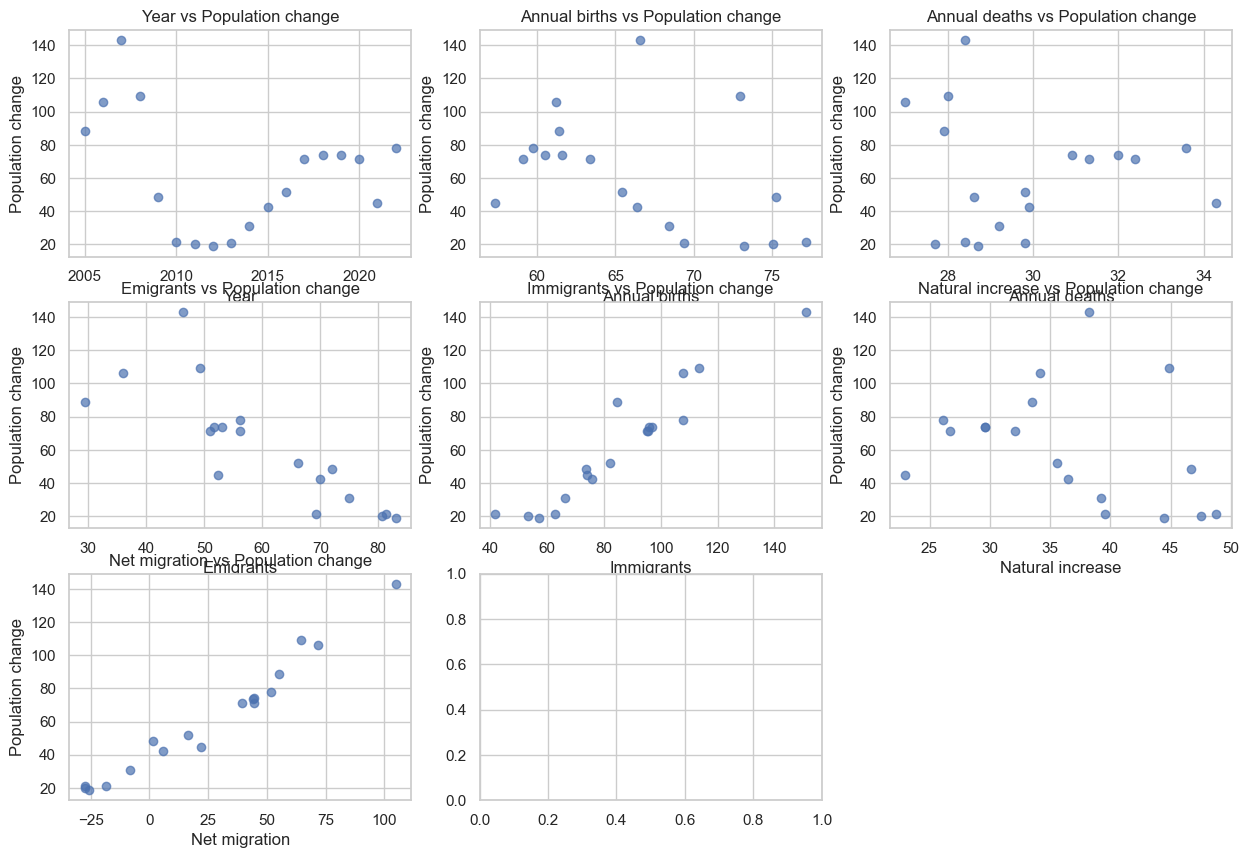

In [448]:
 #Create scatter plots for each feature against 'Population change'
features = ['Year', 'Annual births', 'Annual deaths', 'Emigrants', 'Immigrants', 'Natural increase', 'Net migration', 'Population', 'Residential Property Price Index']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(merged_df2[feature], merged_df2['Population change'], alpha=0.7)
    plt.title(f'{feature} vs Population change')
    plt.xlabel(feature)
    plt.ylabel('Population change')

plt.tight_layout()
plt.show()


In [ ]:
# Remove '%' and convert the 'Inflation Rate' to float
merged_df2['Inflation Rate'] = merged_df2[ 'Inflation Rate'].str.replace('%', '').astype(float) / 100


In [449]:
merged_df2.head()

,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population change,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Inflation Rate
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,88.6,131.8,9.3,2.43%
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,106.0,151.4,14.9,3.93%
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,142.9,162.7,7.5,4.90%
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,109.2,151.4,-6.9,4.06%
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,48.3,122.4,-19.1,-4.48%


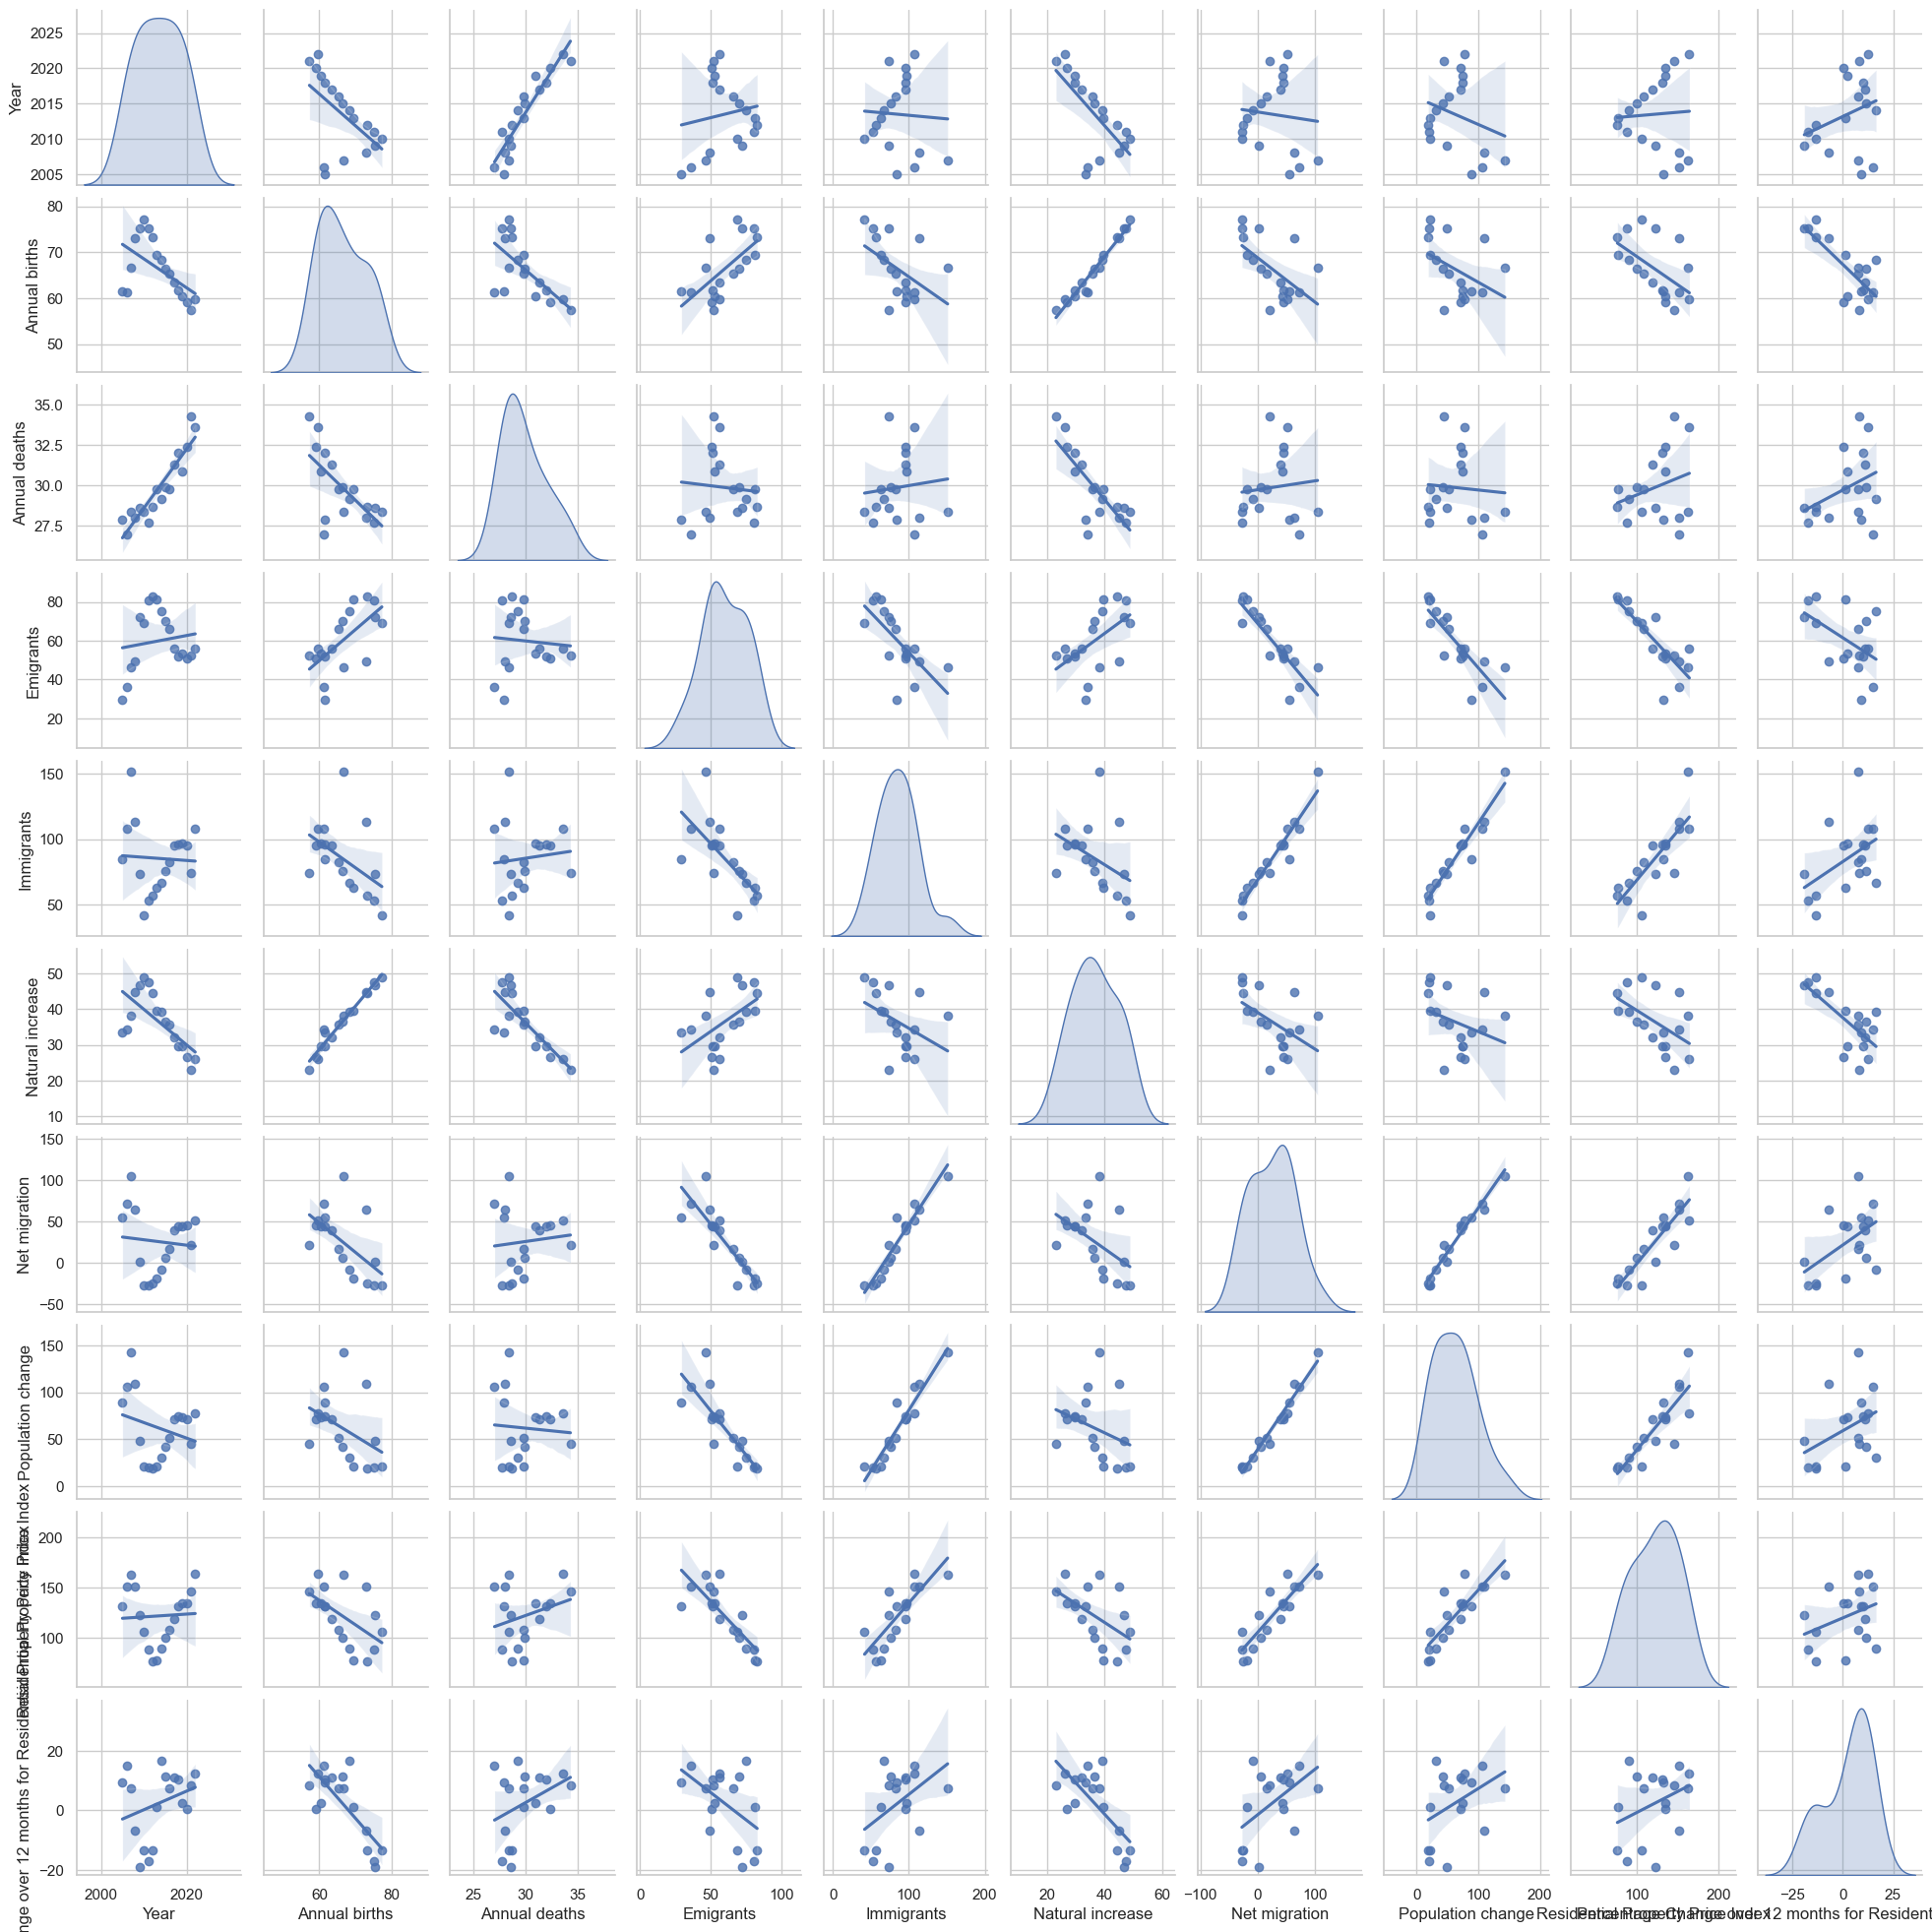

In [450]:
#Pairplot with linear regression lines for each feature against 'Population change.
import seaborn as sns
sns.pairplot(merged_df2, kind='reg', diag_kind='kde', height=2)
plt.show()

In [451]:
# Define the column you want to move to the end
column_to_move = 'Population change'  

# Reorder the columns
columns = [col for col in merged_df2.columns if col != column_to_move] + [column_to_move]
merged_df2 = merged_df2[columns]


In [452]:
merged_df2.head()

,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Inflation Rate,Population change
0,Annual Population Change,2005,61.4,27.9,29.4,84.6,33.5,55.1,131.8,9.3,2.43%,88.6
1,Annual Population Change,2006,61.2,27.0,36.0,107.8,34.2,71.8,151.4,14.9,3.93%,106.0
2,Annual Population Change,2007,66.6,28.4,46.3,151.1,38.2,104.8,162.7,7.5,4.90%,142.9
3,Annual Population Change,2008,73.0,28.0,49.2,113.5,44.9,64.3,151.4,-6.9,4.06%,109.2
4,Annual Population Change,2009,75.3,28.6,72.0,73.7,46.7,1.6,122.4,-19.1,-4.48%,48.3


In [453]:
# Select columns 1 and 11 from merged_df2
Population_change = merged_df2.iloc[:, [1, 11]]

In [454]:
Population_change

,Year,Population change
0,2005,88.6
1,2006,106.0
2,2007,142.9
3,2008,109.2
4,2009,48.3
5,2010,21.4
6,2011,20.1
7,2012,18.8
8,2013,21.0
9,2014,30.8


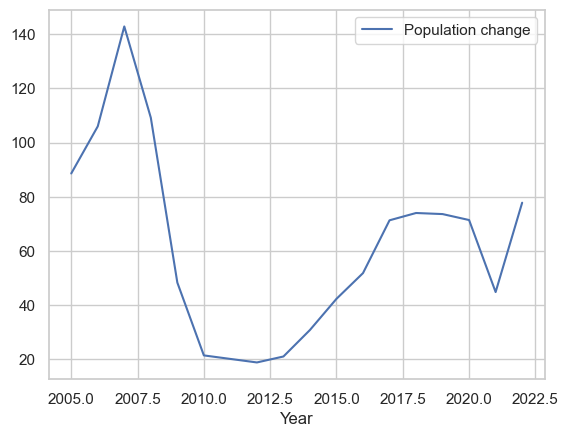

In [455]:
Population_change = merged_df2.iloc[:, [1, 11]].plot.line(x='Year', y='Population change')

In [457]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.preprocessing import MinMaxScaler

# BINOMIAL DISTRIBUTION

In [476]:
# Getting the average of annual deaths 
#merged_df2['Annual deaths'].mean()


# Calculate the mean of 'Annual deaths' from the loaded_data DataFrame
mean_annual_deaths = merged_df2['Annual deaths'].mean()

In [477]:
mean_annual_deaths

29.883333333333333

In [478]:
n = 1000
p = mean_annual_deaths / n

# Generate random binomial values with the calculated mean and probability
av_deaths = np.random.binomial(n, p, size=1000)

In [479]:
# Set the style for the Seaborn plot to 'whitegrid'
sns.set_theme(style='whitegrid')

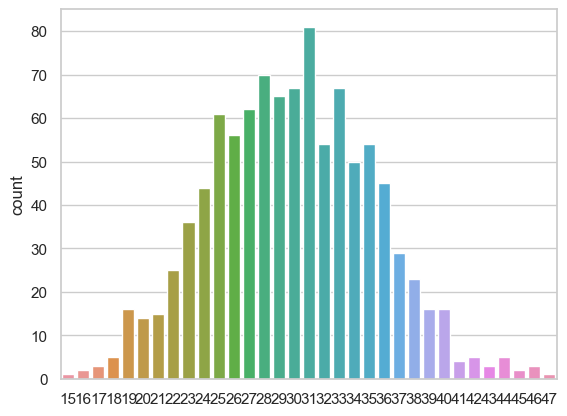

In [480]:
# Create a countplot of the random binomial values
sns.countplot(x=av_deaths)

# Show the plot
plt.show()

In [ ]:
# Calculate the mean of 'Annual deaths' from the loaded_data DataFrame
mean_annual_Inflation = merged_df2['Inflation Rate'].mean()
mean_annual_Inflation

In [481]:

n = 100
p = mean_annual_Inflation / n

# Generate random binomial values with the calculated mean and probability
av_Inflation = np.random.binomial(n, p, size=100)

In [482]:
# Set the style for the Seaborn plot to 'whitegrid'
sns.set_theme(style='whitegrid')

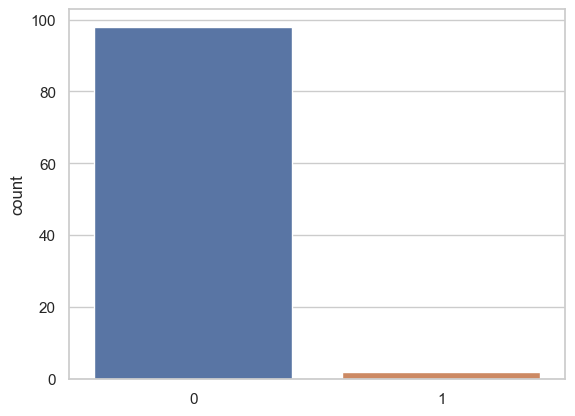

In [483]:
# Create a countplot of the random binomial values
sns.countplot(x=av_Inflation)
# Show the plot
plt.show()

# POISSON DISTRIBUTION

In [484]:
#Generating random numbers with the average of Annual deaths 
np.random.poisson(29.9)

31

In [485]:
#Creating a Poisson distribution with the mean (average) of 29.9 and generating 1000 random numbers 
poisson_data=np.random.poisson(29.9, 1000)

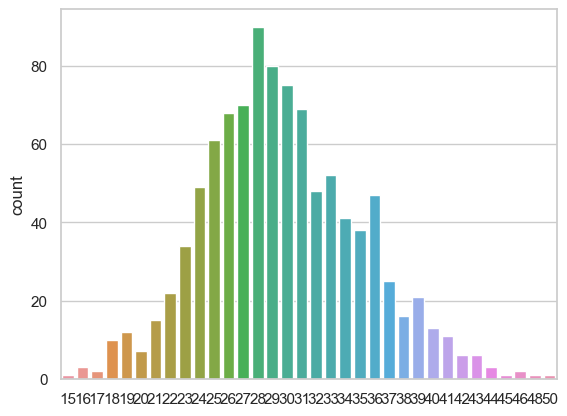

In [486]:
#Showing the Poisson distribution percentage death count per x size
sns.set_theme(style='whitegrid')
sns.countplot(x=poisson_data)
plt.show()

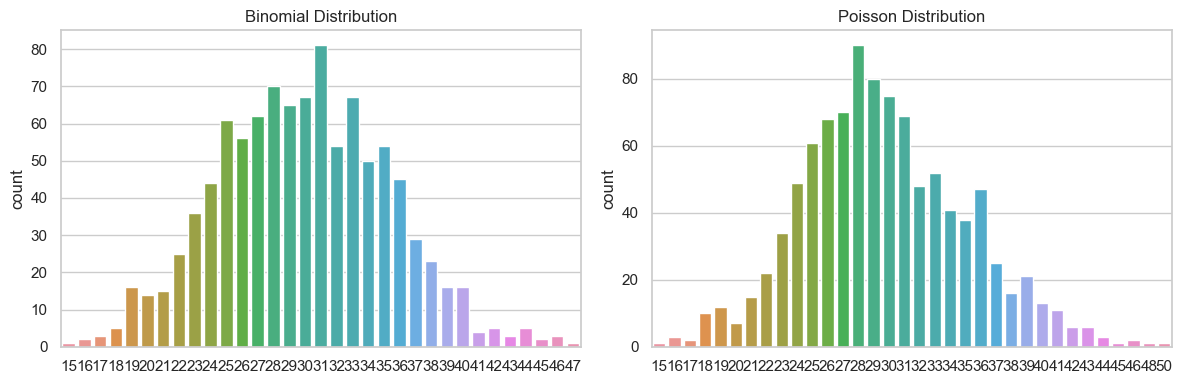

In [487]:
# Create a subplot with two plots side by side
plt.figure(figsize=(12, 4))

# Plot for the Binomial distribution
plt.subplot(1, 2, 1)
sns.countplot(x=av_deaths)
plt.title("Binomial Distribution")

# Plot for the Poisson distribution
plt.subplot(1, 2, 2)
sns.countplot(x=poisson_data)
plt.title("Poisson Distribution")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [488]:
mean_annual_Net_migration = merged_df2['Net migration'].mean()

In [389]:
mean_annual_Net_migration

25.427777777777777

In [390]:
#Generating random numbers with the average of Annual deaths 
np.random.poisson(25.43)

21

In [391]:
#Creating a Poisson distribution with the mean (average) of 29.9 and generating 1000 random numbers 
poisson_data2=np.random.poisson(29, 1000)

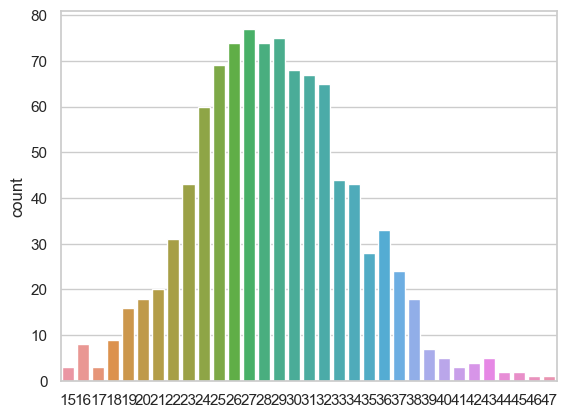

In [392]:
#Showing the Poisson distribution percentage death count per x size
sns.set_theme(style='whitegrid')
sns.countplot(x=poisson_data2)
plt.show()

# NORMAL DISTRIBUTION 

In [393]:
# Calculate the standard deviation of 'Annual deaths' from the merged_df2 DataFrame
std_annual_deaths = merged_df2['Annual deaths'].std()

print("Standard Deviation of Annual Deaths:", std_annual_deaths)


Standard Deviation of Annual Deaths: 2.109711438311215


In [394]:
# Using the mean and standard deviation to generate random numbers 
np.random.normal(29.9, 2.11)

27.65227080403072

In [395]:
from scipy.stats import norm

norm.sf(29.9, 2.11)

2.8648337967635858e-170

In [396]:
#Generating 1000 samples (rounding up to 2 decimal pleaces) using numpy to simulate the normal distribution
np.round(np.random.normal(29.9, 2.11, 1000),2)

array([30.19, 29.43, 26.98, 31.77, 29.43, 31.5 , 29.53, 28.8 , 30.59,
       28.93, 28.72, 26.15, 28.89, 29.87, 32.99, 33.37, 29.92, 28.41,
       31.27, 26.22, 30.8 , 30.43, 31.46, 29.38, 30.03, 32.81, 26.86,
       30.  , 28.11, 27.57, 26.2 , 29.14, 32.36, 29.85, 27.77, 28.85,
       31.81, 33.61, 27.74, 27.58, 31.39, 29.7 , 29.14, 26.7 , 34.13,
       27.2 , 30.14, 30.97, 28.3 , 32.6 , 30.53, 32.06, 30.99, 31.33,
       32.92, 28.36, 28.84, 30.42, 26.94, 29.02, 28.84, 29.42, 30.76,
       30.54, 28.28, 31.2 , 27.92, 32.95, 29.6 , 31.1 , 28.35, 29.41,
       28.39, 30.26, 30.2 , 30.16, 29.21, 26.58, 27.77, 26.68, 30.3 ,
       30.81, 26.22, 29.34, 25.72, 28.01, 31.55, 29.49, 27.09, 24.01,
       23.99, 30.29, 27.82, 32.72, 28.23, 27.25, 30.67, 30.99, 31.39,
       27.58, 32.46, 34.39, 31.8 , 30.33, 34.73, 29.98, 31.38, 25.37,
       30.12, 31.72, 31.2 , 26.73, 27.59, 27.16, 33.37, 29.89, 30.16,
       32.75, 28.98, 26.5 , 30.16, 28.89, 30.12, 32.67, 31.15, 33.26,
       29.63, 27.6 ,

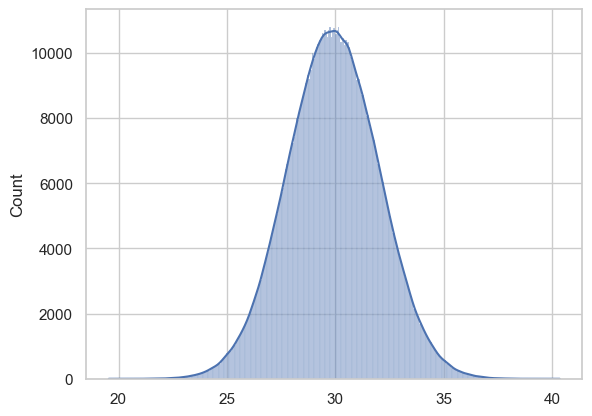

In [397]:
# Set the style for the Seaborn plot to 'whitegrid'
sns.set_theme(style='whitegrid')
nor_distribution = np.random.normal(29.9, 2.11, 1000000)# As the data size increases the diagram will look a normal distributionl look a normal ditribution
sns.histplot(x=nor_distribution, kde=True)
plt.show()

In [398]:
# getting the percentage of the right arear of minus 1 sigma and plus 1 sigma
sum((nor_distribution > 27.5) & (nor_distribution< 32.5))

763935

In [399]:
# getting the percentage of the right arear of minus 2 sigma and plus 2 sigma
sum((nor_distribution > 26.5) & (nor_distribution< 34.5))

932559

In [400]:
# getting the percentage of the right arear of minus 3 sigma and plus 3 sigma
sum((nor_distribution > 24.5) & (nor_distribution< 36.5))

993830

# Normalizing Numeric Columns in a DataFrame

In [401]:
df_draft = pd.DataFrame(merged_df2)

# Extracting the numeric columns to normalize
columns_to_normalize = df_draft.columns[2:11]

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the selected columns and transform them
df_draft[columns_to_normalize] = scaler.fit_transform(df_draft[columns_to_normalize])


In [402]:
df_draft.head(18)

,STATISTIC Label,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Residential Property Price Index,Percentage Change over 12 months for Residential Property Price Index,Inflation Rate,Population change
0,Annual Population Change,2005,0.206030,0.123288,0.000000,0.391583,0.406977,0.624339,0.000000,0.634091,0.797753,0.0243,88.6
1,Annual Population Change,2006,0.195980,0.000000,0.123134,0.603843,0.434109,0.750567,0.094363,0.856818,0.955056,0.0393,106.0
2,Annual Population Change,2007,0.467337,0.191781,0.315299,1.000000,0.589147,1.000000,0.230432,0.985227,0.747191,0.0490,142.9
3,Annual Population Change,2008,0.788945,0.136986,0.369403,0.655993,0.848837,0.693878,0.334508,0.856818,0.342697,0.0406,109.2
4,Annual Population Change,2009,0.904523,0.219178,0.794776,0.291857,0.918605,0.219955,0.380499,0.527273,0.000000,-0.0448,48.3
5,Annual Population Change,2010,1.000000,0.191781,0.742537,0.000000,1.000000,0.000000,0.400876,0.340909,0.160112,-0.0092,21.4
6,Annual Population Change,2011,0.894472,0.095890,0.955224,0.105215,0.949612,0.000756,0.420015,0.135227,0.056180,0.0256,20.1
7,Annual Population Change,2012,0.798995,0.232877,1.000000,0.141812,0.833333,0.013605,0.437917,0.000000,0.157303,0.0170,18.8
8,Annual Population Change,2013,0.608040,0.383562,0.968284,0.191217,0.643411,0.066515,0.457913,0.011364,0.570225,0.0051,21.0
9,Annual Population Change,2014,0.557789,0.301370,0.850746,0.225984,0.627907,0.143613,0.487145,0.155682,1.000000,0.0018,30.8


In [173]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   STATISTIC Label                                                        18 non-null     object 
 1   Year                                                                   18 non-null     int64  
 2   Annual births                                                          18 non-null     float64
 3   Annual deaths                                                          18 non-null     float64
 4   Emigrants                                                              18 non-null     float64
 5   Immigrants                                                             18 non-null     float64
 6   Natural increase                                                       18 non-null     float

In [174]:
# Drop STATISTIC Label coulumn 
df_draft = df_draft.drop(columns=['STATISTIC Label'])

# GridSearchCV with Ridge Regression vs SVR

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [176]:
df_draft['Year'] = pd.to_datetime(df_draft['Year'], format='%Y').dt.year  # Convert 'Year' to a numeric year format

X = df_draft.drop(['Population change'], axis=1)  # Features
y = df_draft['Population change']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
# Ridge Regression model
ridge_model = Ridge()

# Support Vector Regressor model
svr_model = SVR()

# Define hyperparameters to search for Ridge
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}

# Define hyperparameters to search for SVR
param_grid_svr = {'C': [0.1, 1.0, 10.0],
                  'gamma': ['scale', 'auto', 0.01, 0.1, 1.0]}


In [178]:
# Create a GridSearchCV instance for Ridge
ridge_cv = GridSearchCV(ridge_model, param_grid_ridge, cv=5)
# Create a GridSearchCV instance for SVR
svr_cv = GridSearchCV(svr_model, param_grid_svr, cv=5)

# Fit the Ridge model
ridge_cv.fit(X_train, y_train)
# Fit the SVR model
svr_cv.fit(X_train, y_train)

# Get the best hyperparameters for Ridge
best_alpha = ridge_cv.best_params_['alpha']
# Get the best hyperparameters for SVR
best_C = svr_cv.best_params_['C']
best_gamma = svr_cv.best_params_['gamma']

In [179]:
# Function to predict population change for a specific year
def predict_population_change_for_year(year_to_predict, model='ridge'):
    X_last_year = X_train[-1, :]
    X_last_year = X_last_year.reshape(1, -1)  # Reshape for prediction

    # Predict population change for the specified year using the selected model
    if model == 'ridge':
        predicted_population_change = ridge_cv.predict(X_last_year)
    elif model == 'svr':
        predicted_population_change = svr_cv.predict(X_last_year)
    else:
        raise ValueError("Invalid model specified. Choose 'ridge' or 'svr'.")

    return predicted_population_change[0]


In [180]:
# Input year from the user
user_year = int(input("Enter the year to predict population change: "))

# We assume the user enters a future year for which we have no data,
# so we'll use our last known data to make a prediction.
predicted_change = predict_population_change_for_year(user_year)
print(f"Predicted Population change for {user_year}: {predicted_change}")

# Evaluate model accuracy on the test set
y_test_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)


Enter the year to predict population change: 2024
Predicted Population change for 2024: 20.433421914102688


In [182]:
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Regression - R-squared (R2): {r2_ridge}")

y_test_pred_svr = svr_cv.predict(X_test)
mse_svr = mean_squared_error(y_test, y_test_pred_svr)
r2_svr = r2_score(y_test, y_test_pred_svr)

print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - R-squared (R2): {r2_svr}")

Ridge Regression - Mean Squared Error (MSE): 6.073741521341463
Ridge Regression - R-squared (R2): 0.995911776005505
SVR - Mean Squared Error (MSE): 588.4758910887747
SVR - R-squared (R2): 0.6038979845162025


In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics from your results
ridge_mse = 6.073741521341463
ridge_r2 = 0.995911776005505
svr_mse = 588.4758910887747
svr_r2 = 0.6038979845162025

# Labels for the metrics
metrics = ['Mean Squared Error', 'R-squared']





In [188]:
# Values for each model
ridge_scores = [ridge_mse, ridge_r2]
svr_scores = [svr_mse, svr_r2]

# Create the bar chart
x_labels = np.arange(len(metrics))
bar_width = 0.35  # Width of the bars




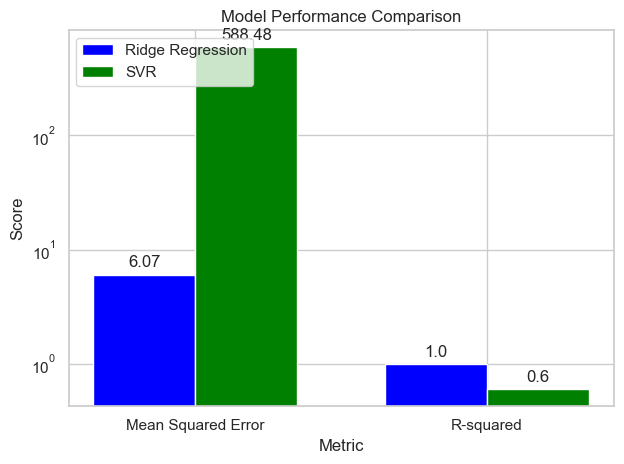

In [189]:
fig, ax = plt.subplots()
bar1 = ax.bar(x_labels - bar_width/2, ridge_scores, bar_width, label='Ridge Regression', color='blue')
bar2 = ax.bar(x_labels + bar_width/2, svr_scores, bar_width, label='SVR', color='green')
# Adding text for labels, title, and custom x-axis tick labels.
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_labels)
ax.set_xticklabels(metrics)
ax.set_yscale('log')  # Set the y-axis to a logarithmic scale

# Place a legend to the right of this smaller subplot.
ax.legend(loc='upper left')

# Add numerical labels to the bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [190]:
# Performance metrics
ridge_mse = 6.073741521341463
ridge_r2 = 0.995911776005505
svr_mse = 588.4758910887747
svr_r2 = 0.6038979845162025

# Data to plot
metrics = ['Mean Squared Error', 'R-squared']
ridge_scores = [ridge_mse, ridge_r2]
svr_scores = [svr_mse, svr_r2]

# Bar positions
bar_positions = range(len(metrics))




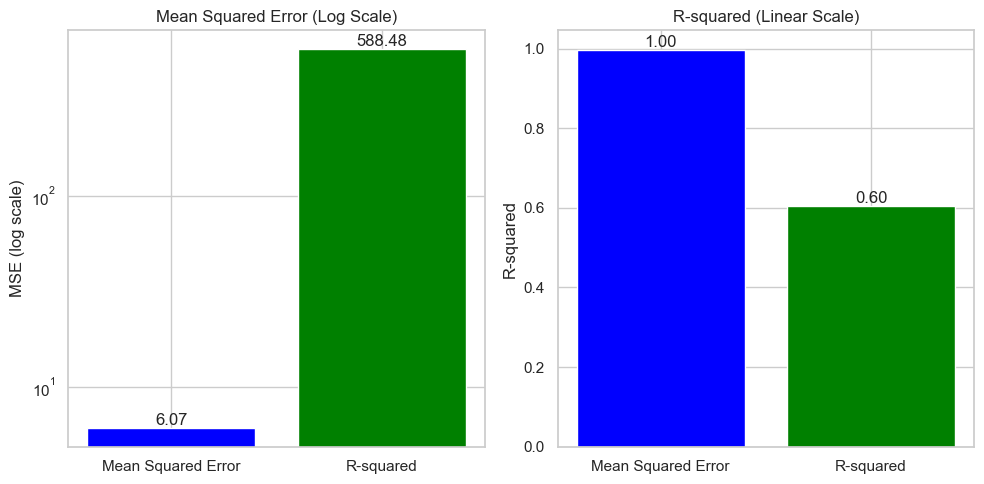

In [191]:
# Plotting Mean Squared Error with a log scale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, chart 1
plt.bar(bar_positions, [ridge_mse, svr_mse], color=['blue', 'green'], log=True)
plt.xticks(bar_positions, metrics)
plt.title('Mean Squared Error (Log Scale)')
plt.ylabel('MSE (log scale)')
for i, score in enumerate([ridge_mse, svr_mse]):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Plotting R-squared on a linear scale
plt.subplot(1, 2, 2)  # 1 row, 2 columns, chart 2
plt.bar(bar_positions, [ridge_r2, svr_r2], color=['blue', 'green'])
plt.xticks(bar_positions, metrics)
plt.title('R-squared (Linear Scale)')
plt.ylabel('R-squared')
for i, score in enumerate([ridge_r2, svr_r2]):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()
plt.show()

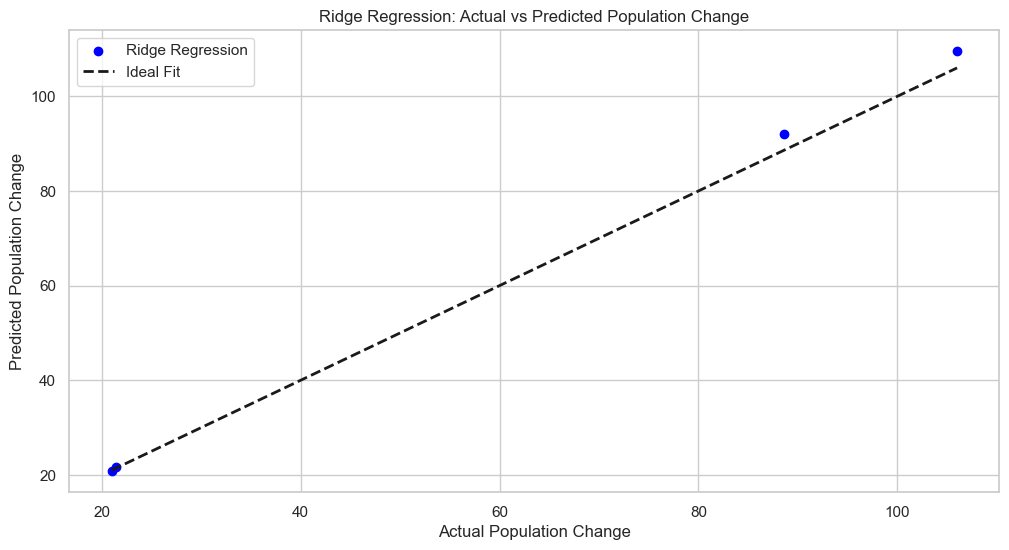

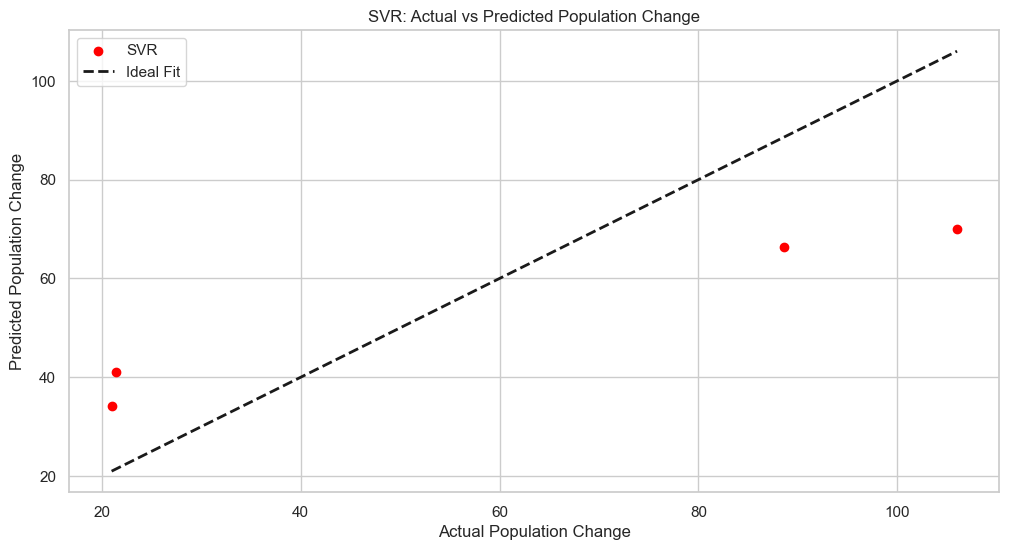

In [192]:
import matplotlib.pyplot as plt

# Scatter plot for Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_ridge, color='blue', label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Population Change')
plt.ylabel('Predicted Population Change')
plt.title('Ridge Regression: Actual vs Predicted Population Change')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for SVR
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_svr, color='red', label='SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Population Change')
plt.ylabel('Predicted Population Change')
plt.title('SVR: Actual vs Predicted Population Change')
plt.legend()
plt.grid(True)
plt.show()


In [193]:
ridge_cv.cv_results_

{'mean_fit_time': array([3.64151001e-03, 9.99879837e-04, 2.67982483e-05]),
 'std_fit_time': array([5.73735571e-03, 1.15232906e-06, 5.35964966e-05]),
 'mean_score_time': array([0.00020008, 0.00020027, 0.00020132]),
 'std_score_time': array([0.00040016, 0.00040054, 0.00040264]),
 'param_alpha': masked_array(data=[0.1, 1.0, 10.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1}, {'alpha': 1.0}, {'alpha': 10.0}],
 'split0_test_score': array([0.97428055, 0.94163507, 0.73985972]),
 'split1_test_score': array([0.99965239, 0.99466057, 0.7733682 ]),
 'split2_test_score': array([0.95534964, 0.97645334, 0.92373431]),
 'split3_test_score': array([0.99736622, 0.99112438, 0.92363168]),
 'split4_test_score': array([0.99899496, 0.99277531, 0.88348222]),
 'mean_test_score': array([0.98512875, 0.97932973, 0.84881523]),
 'std_test_score': array([0.01764903, 0.01992031, 0.07742833]),
 'rank_test_score': array([1, 2, 3])}

In [194]:
# best paramenter 

best_params = ridge_cv.best_params_
print(best_params)

{'alpha': 0.1}


In [195]:
#highest accuracy

highest_accuracy = ridge_cv.best_score_
print(highest_accuracy)

0.9851287529029067


In [196]:
#loading the result to pandas dataframe
result = pd.DataFrame(ridge_cv.cv_results_)

In [197]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003642,0.005737,0.000200,0.000400,0.1,{'alpha': 0.1},0.974281,0.999652,0.955350,0.997366,0.998995,0.985129,0.017649,1
1,0.001000,0.000001,0.000200,0.000401,1.0,{'alpha': 1.0},0.941635,0.994661,0.976453,0.991124,0.992775,0.979330,0.019920,2
2,0.000027,0.000054,0.000201,0.000403,10.0,{'alpha': 10.0},0.739860,0.773368,0.923734,0.923632,0.883482,0.848815,0.077428,3


In [198]:
grid_search_result = result[['param_alpha', 'mean_test_score']]

In [199]:
print(grid_search_result)

  param_alpha  mean_test_score
0         0.1         0.985129
1         1.0         0.979330
2        10.0         0.848815


In [200]:
svr_cv.cv_results_

{'mean_fit_time': array([0.00220041, 0.00152049, 0.00095706, 0.00315113, 0.003125  ,
        0.00032673, 0.        , 0.        , 0.00242376, 0.        ,
        0.00310516, 0.        , 0.00150328, 0.        , 0.00367427]),
 'std_fit_time': array([0.00096696, 0.00047871, 0.0008464 , 0.00630226, 0.00625   ,
        0.00065346, 0.        , 0.        , 0.00484753, 0.        ,
        0.00621033, 0.        , 0.00300655, 0.        , 0.0060779 ]),
 'mean_score_time': array([0.00124397, 0.00129108, 0.00061746, 0.        , 0.        ,
        0.        , 0.00282207, 0.00390396, 0.        , 0.00314875,
        0.        , 0.00314507, 0.        , 0.00172391, 0.        ]),
 'std_score_time': array([0.00038766, 0.0004029 , 0.0008101 , 0.        , 0.        ,
        0.        , 0.00564413, 0.00609533, 0.        , 0.00629749,
        0.        , 0.00629015, 0.        , 0.00344782, 0.        ]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0,
                   

In [201]:
# best paramenter 

best_params2 = svr_cv.best_params_
print(best_params2)

{'C': 10.0, 'gamma': 'auto'}


In [202]:
#highest accuracy

highest_accuracy2 = svr_cv.best_score_
print(highest_accuracy2)

0.1744364636390459


In [203]:
#loading the result to pandas dataframe
result2 = pd.DataFrame(svr_cv.cv_results_)

In [204]:
result2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002200,0.000967,0.001244,0.000388,0.1,scale,"{'C': 0.1, 'gamma': 'scale'}",-0.835768,-1.055590,-0.927003,-1.581975,-0.290533,-0.938174,0.414323,11
1,0.001520,0.000479,0.001291,0.000403,0.1,auto,"{'C': 0.1, 'gamma': 'auto'}",-0.835773,-1.055682,-0.926907,-1.582244,-0.290451,-0.938211,0.414437,12
2,0.000957,0.000846,0.000617,0.000810,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",-0.841758,-1.057781,-0.944772,-1.599468,-0.295322,-0.947820,0.418031,14
3,0.003151,0.006302,0.000000,0.000000,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",-0.835773,-1.055682,-0.926907,-1.582244,-0.290451,-0.938211,0.414437,12
4,0.003125,0.006250,0.000000,0.000000,0.1,1.0,"{'C': 0.1, 'gamma': 1.0}",-0.838693,-1.064249,-0.941153,-1.599314,-0.298444,-0.948371,0.417526,15


# GridSearchCV with Random Forest

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
# Create a RandomForestRegressor model
rf_regressor = RandomForestRegressor()

# Define hyperparameters to search
param_grid = {'n_estimators': [50, 100, 150]}

# Create a GridSearchCV instance
rf_cv = GridSearchCV(rf_regressor, param_grid, cv=5)

# Fit the model
rf_cv.fit(X_train, y_train)

# Get the best number of estimators
best_estimators = rf_cv.best_params_['n_estimators']

In [207]:
# Function to predict population for a specific year
def predict_population_change_for_year(year_to_predict):
    X_year_to_predict = X_test  


    # Predict population change for the specified year
    predicted_population_change = rf_cv.predict(X_year_to_predict)
    return predicted_population_change[0]


In [208]:
# Input year from the user
user_year = int(input("Enter the year to predict population change (e.g., 2023): "))

if user_year >= merged_df2['Year'].min():
    predicted_change = predict_population_change_for_year(user_year)
    print(f"Predicted Population Change for {user_year}: {predicted_change}")
else:
    print("Year is out of the available data range.")

# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, rf_cv.predict(X_test))
r2 = r2_score(y_test, rf_cv.predict(X_test))

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


Enter the year to predict population change (e.g., 2023): 2024
Predicted Population Change for 2024: 93.75533333333325
Mean Squared Error: 105.87931300000113
R-squared (R2): 0.9287328335579791


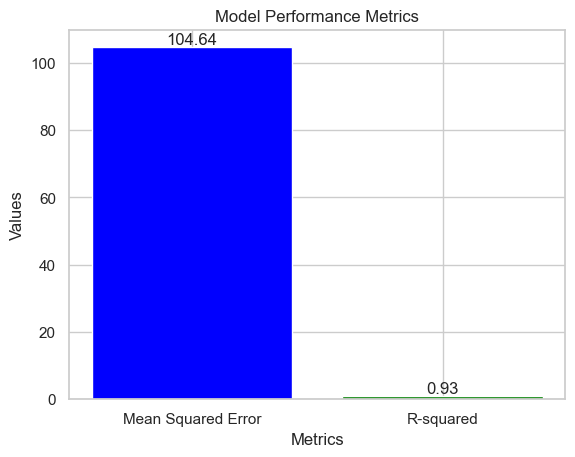

In [209]:
# Performance metrics
metrics = ['Mean Squared Error', 'R-squared']
values = [104.6428352500003, 0.9295651044059318]

# Set position of bar on X axis
r = range(len(metrics))

# Create bars
plt.bar(r, values, color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.xticks(r, metrics)

# Annotate the values on the bars
for i in range(len(r)):
    plt.text(i, values[i], f'{values[i]:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


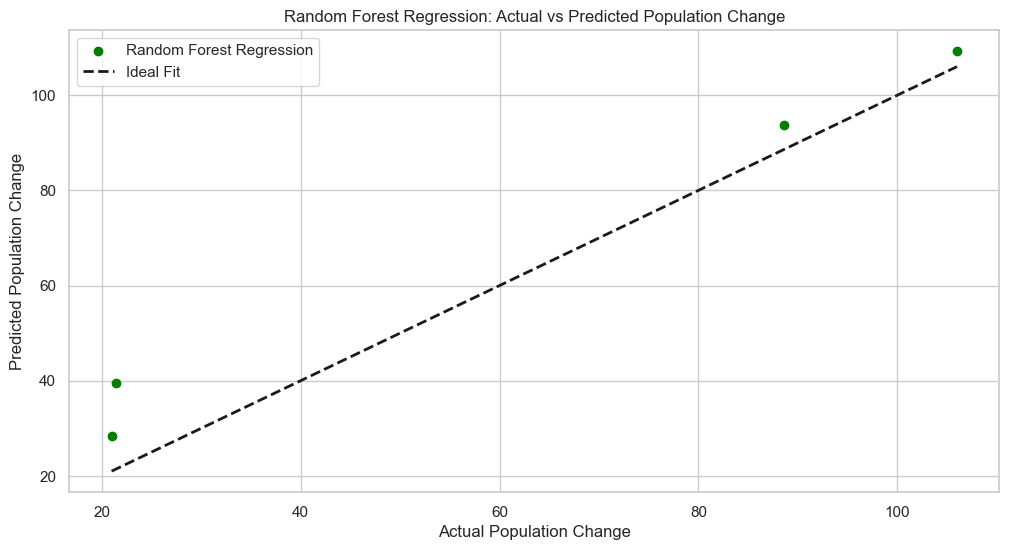

In [210]:
# Predict the population change using the trained RandomForest model
y_test_pred_rf = rf_cv.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_rf, color='green', label='Random Forest Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Population Change')
plt.ylabel('Predicted Population Change')
plt.title('Random Forest Regression: Actual vs Predicted Population Change')
plt.legend()
plt.grid(True)
plt.show()


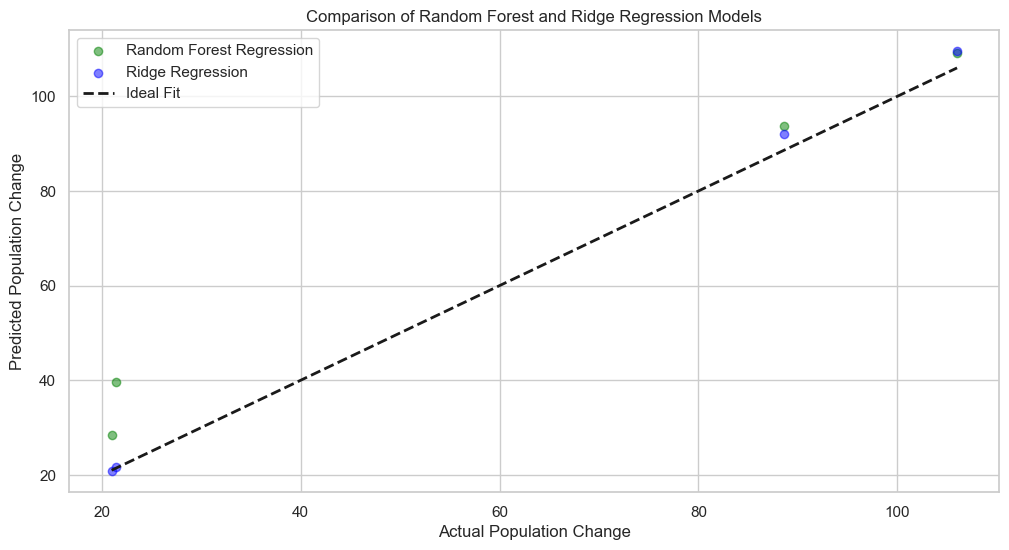

In [211]:
import matplotlib.pyplot as plt

# Predict the population change using the trained Random Forest model
y_test_pred_rf = rf_cv.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot for Random Forest
plt.scatter(y_test, y_test_pred_rf, color='green', alpha=0.5, label='Random Forest Regression')

# Plot for Ridge Regression
plt.scatter(y_test, y_test_pred_ridge, color='blue', alpha=0.5, label='Ridge Regression')

# Ideal fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')

# Plot settings
plt.xlabel('Actual Population Change')
plt.ylabel('Predicted Population Change')
plt.title('Comparison of Random Forest and Ridge Regression Models')
plt.legend()
plt.grid(True)
plt.show()


In [212]:
rf_cv.cv_results_

{'mean_fit_time': array([0.08055205, 0.17006984, 0.26489859]),
 'std_fit_time': array([0.0115642 , 0.00908869, 0.01986649]),
 'mean_score_time': array([0.01238375, 0.00940809, 0.01947169]),
 'std_score_time': array([0.0044985 , 0.00768194, 0.00605586]),
 'param_n_estimators': masked_array(data=[50, 100, 150],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 150}],
 'split0_test_score': array([0.48394477, 0.22694258, 0.43106781]),
 'split1_test_score': array([0.26992988, 0.28096181, 0.34876378]),
 'split2_test_score': array([0.83307829, 0.81491053, 0.86938676]),
 'split3_test_score': array([0.88516781, 0.76560812, 0.86963564]),
 'split4_test_score': array([0.74338261, 0.61202626, 0.72810732]),
 'mean_test_score': array([0.64310067, 0.54008986, 0.64939226]),
 'std_test_score': array([0.23209115, 0.24362606, 0.21961049]),
 'rank_test_score': array([2, 3, 1])}

In [213]:
# best paramenter 

RandomForest_best_params = rf_cv.best_params_
print(RandomForest_best_params)

{'n_estimators': 150}


In [214]:
RandomForest_highest_accuracy = rf_cv.best_score_
print(RandomForest_highest_accuracy)

0.64939225903357


In [215]:
#loading the result to pandas dataframe
result2 = pd.DataFrame(rf_cv.cv_results_)

In [216]:
result2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080552,0.011564,0.012384,0.004499,50,{'n_estimators': 50},0.483945,0.269930,0.833078,0.885168,0.743383,0.643101,0.232091,2
1,0.170070,0.009089,0.009408,0.007682,100,{'n_estimators': 100},0.226943,0.280962,0.814911,0.765608,0.612026,0.540090,0.243626,3
2,0.264899,0.019866,0.019472,0.006056,150,{'n_estimators': 150},0.431068,0.348764,0.869387,0.869636,0.728107,0.649392,0.219610,1


In [217]:
grid_search_result2 = result[['param_alpha', 'mean_test_score']]

In [218]:
print(grid_search_result2)

  param_alpha  mean_test_score
0         0.1         0.985129
1         1.0         0.979330
2        10.0         0.848815


In [219]:
# Model names
models = ['Random Forest', 'Ridge Regression']

# MSE and R2 values for each model
mse_values = [105.87931300000113, 6.073741521341463]  # Random Forest, Ridge Regression
r2_values = [0.9287328335579791, 0.995911776005505]  # Random Forest, Ridge Regression


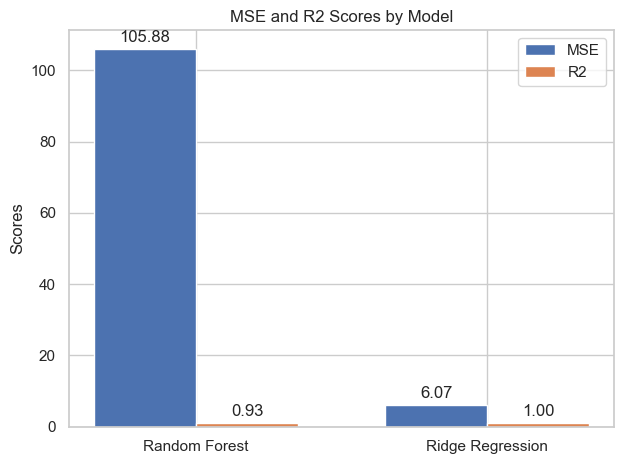

In [220]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, r2_values, width, label='R2')

# Adds text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('MSE and R2 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Show the plot
plt.show()